In [1]:
import ROOT as r
import sys
from operator import attrgetter, itemgetter
from itertools import combinations
from VBSAnalysis.EventIterator import EventIterator
from VBSAnalysis.Utils import JetSelectors as jsel
from VBSAnalysis import JetTagging 
import argparse
import myplotter as plotter
plotter.setStyle()


Welcome to JupyROOT 6.14/00


In [2]:
f = r.TFile("data/ewk_giacomo.root")

In [3]:
cuts = [
    ("pt_min_jets",30),
    ("min_njets",4),
    #("eq_njets",4),
    #("eta_max_jets", 2),
    ("eq_flag", 0),
    #("n_events", 1000)
]

In [22]:
flags = r.TH1F("flag", "flag",3, 0, 3)

0.0


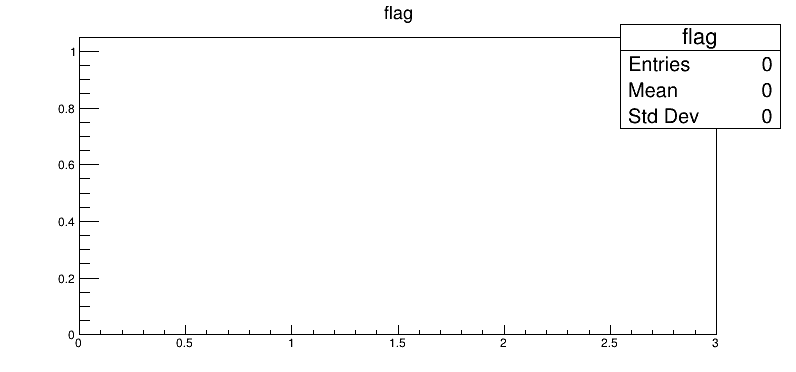

In [23]:
c1 = r.TCanvas("c1","c1", 50, 50, 800, 400)
flags.Draw("hist")
print(flags.GetBinContent(3))
c1.Draw()

In [4]:
hs_deltaeta = r.THStack("deltaeta distribution","Deltaeta distribution");
h_deltaeta = r.TH1F("deltaeta distribution1", "Mjj maxeta good ", 60, -8, 8 )
h_deltaeta.SetLineColor(r.kRed)
h_deltaeta.SetFillColor(r.kRed)
h_deltaeta.SetFillStyle(3004)
hs_deltaeta.Add(h_deltaeta)
h_deltaeta_bad = r.TH1F("deltaeta distribution", "Mjj maxeta bad ", 60, -8, 8 )
h_deltaeta_bad.SetLineColor(r.kBlue)
h_deltaeta_bad.SetFillColor(r.kBlue)
h_deltaeta_bad.SetFillStyle(3005)
hs_deltaeta.Add(h_deltaeta_bad)

In [5]:
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #jsel selettore di getti il cui metodo viene applicato anche ai partoni per creare le coppie
    partons_pair = jsel.max_mjj_pair(evento.partons)
    jets_pair = jsel.max_deltaeta_pair(evento.jets)
    associazione = JetTagging.check_association(evento, partons_pair, [evento.jets[i] for i in jets_pair])
    if associazione:
        #se l'associazione va a buon fine restituisce TRUE e riempio l'histo con la massa dei due getti
            h_deltaeta.Fill(evento.jets[jets_pair[0]].Eta()- evento.jets[jets_pair[1]].Eta())
    else :
        #se l'associazione non va a buon fine restituisce FALSE e inserisco nel secondo histo la massa dei due getti
            h_deltaeta_bad.Fill(evento.jets[jets_pair[0]].Eta()- evento.jets[jets_pair[1]].Eta()) 

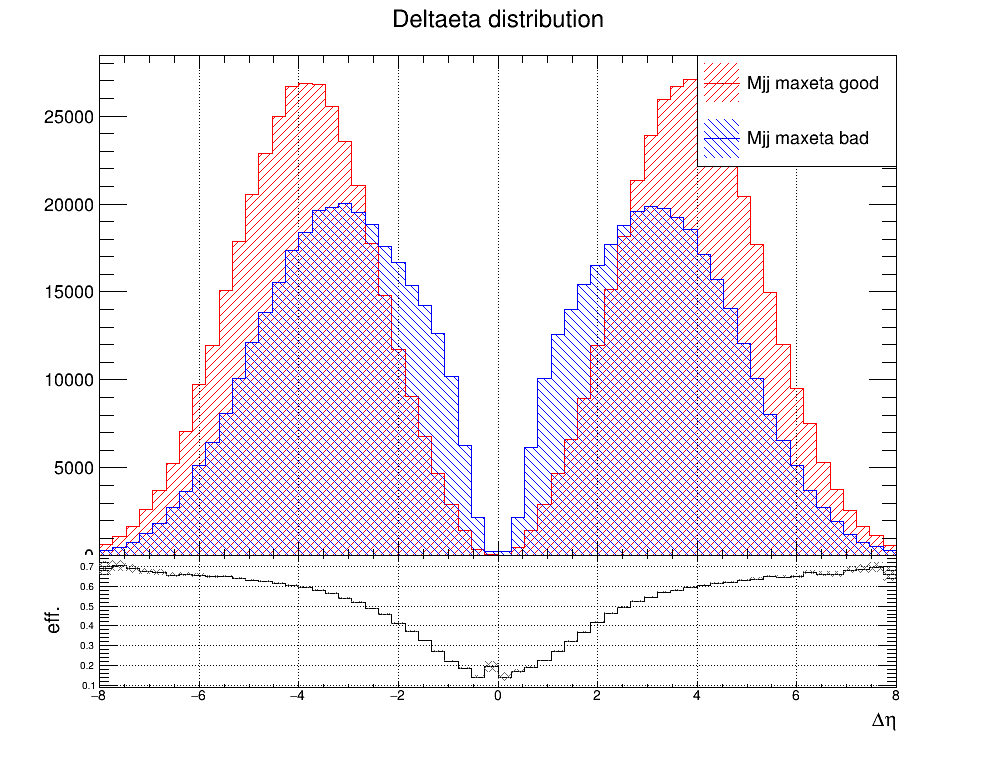

In [6]:
c2, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_deltaeta.Draw("nostack hist")
legend = plotter.createLegend(h_deltaeta, h_deltaeta_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_deltaeta, h_deltaeta +h_deltaeta_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "#Delta#eta")
hratio.GetXaxis().SetLabelSize(0.07)
c2.Draw()

In [7]:
print('efficiency')
print(h_deltaeta.GetEntries()/(h_deltaeta.GetEntries()+h_deltaeta_bad.GetEntries()))

efficiency
0.5410001518687971


In [10]:
hs_pt = r.THStack("hs_pt","Pt maxpt jet");
h_pt = r.TH1F("mjj_pt_good", "Pt maxpt good ", 60, 80, 1000 )
h_pt.SetLineColor(r.kRed)
h_pt.SetFillColor(r.kRed)
h_pt.SetFillStyle(3004)
hs_pt.Add(h_pt)
h_pt_bad = r.TH1F("mjj_pt_bad ", "Pt maxpt bad ", 60, 80, 1000 )
h_pt_bad.SetLineColor(r.kBlue)
h_pt_bad.SetFillColor(r.kBlue)
h_pt_bad.SetFillStyle(3005)
hs_pt.Add(h_pt_bad)

In [11]:
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #jsel selettore di getti il cui metodo viene applicato anche ai partoni per creare le coppie
    partons_pair = jsel.max_mjj_pair(evento.partons)
    jets_pair = jsel.max_pt_pair(evento.jets)
    associazione = JetTagging.check_association(evento, partons_pair, [evento.jets[i] for i in jets_pair])
    if associazione:
        #se l'associazione va a buon fine restituisce TRUE e riempio l'histo con la massa dei due getti
            h_pt.Fill( (evento.jets[jets_pair[0]]+ evento.jets[jets_pair[1]]).Pt())
    else :
        #se l'associazione non va a buon fine restituisce FALSE e inserisco nel secondo histo la massa dei due getti
            h_pt_bad.Fill((evento.jets[jets_pair[0]]+ evento.jets[jets_pair[1]]).Pt())

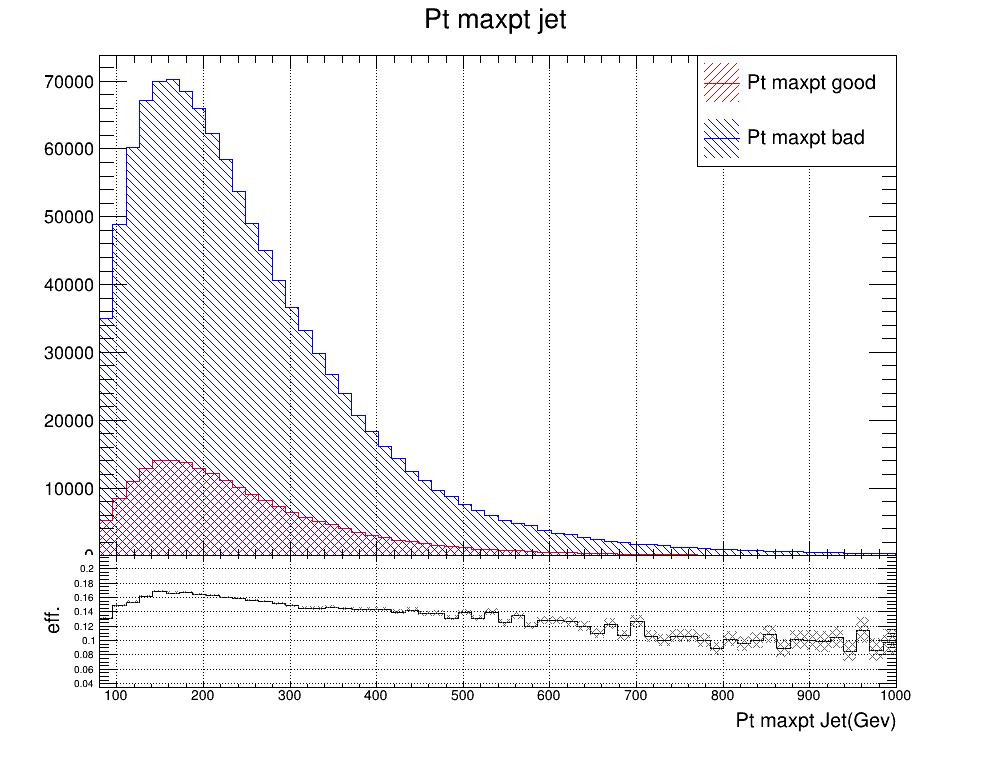

In [12]:
c1, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_pt.Draw("nostack hist")
legend = plotter.createLegend(h_pt, h_pt_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_pt, h_pt +h_pt_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, " Pt maxpt Jet(Gev)")
hratio.GetXaxis().SetLabelSize(0.07)
c1.Draw()

In [13]:
print('efficiency')
print(h_pt.GetEntries()/(h_pt.GetEntries()+h_pt_bad.GetEntries()))

efficiency
0.15247037452614723


# NEAREST W PAIR

In [14]:
hs_mw = r.THStack("hs_mw","Mw jet");
h_mw = r.TH1F("mw_good", "Mw good ", 60, 20, 150 )
h_mw.SetLineColor(r.kRed)
h_mw.SetFillColor(r.kRed)
h_mw.SetFillStyle(3004)
hs_mw.Add(h_mw)
h_mw_bad = r.TH1F("mw_bad ", "Mw bad ", 60, 20, 150 )
h_mw_bad.SetLineColor(r.kBlue)
h_mw_bad.SetFillColor(r.kBlue)
h_mw_bad.SetFillStyle(3005)
hs_mw.Add(h_mw_bad)

In [15]:
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #jsel selettore di getti il cui metodo viene applicato anche ai partoni per creare le coppie
    partons_pair = jsel.nearest_W_pair(evento.partons)
    jets_pair = jsel.nearest_W_pair(evento.jets)
    associazione = JetTagging.check_association(evento, partons_pair, [evento.jets[i] for i in jets_pair])
    if associazione:
        #se l'associazione va a buon fine restituisce TRUE e riempio l'histo con la massa dei due getti
            h_mw.Fill( (evento.jets[jets_pair[0]]+ evento.jets[jets_pair[1]]).M())
    else :
        #se l'associazione non va a buon fine restituisce FALSE e inserisco nel secondo histo la massa dei due getti
            h_mw_bad.Fill((evento.jets[jets_pair[0]]+ evento.jets[jets_pair[1]]).M()) 

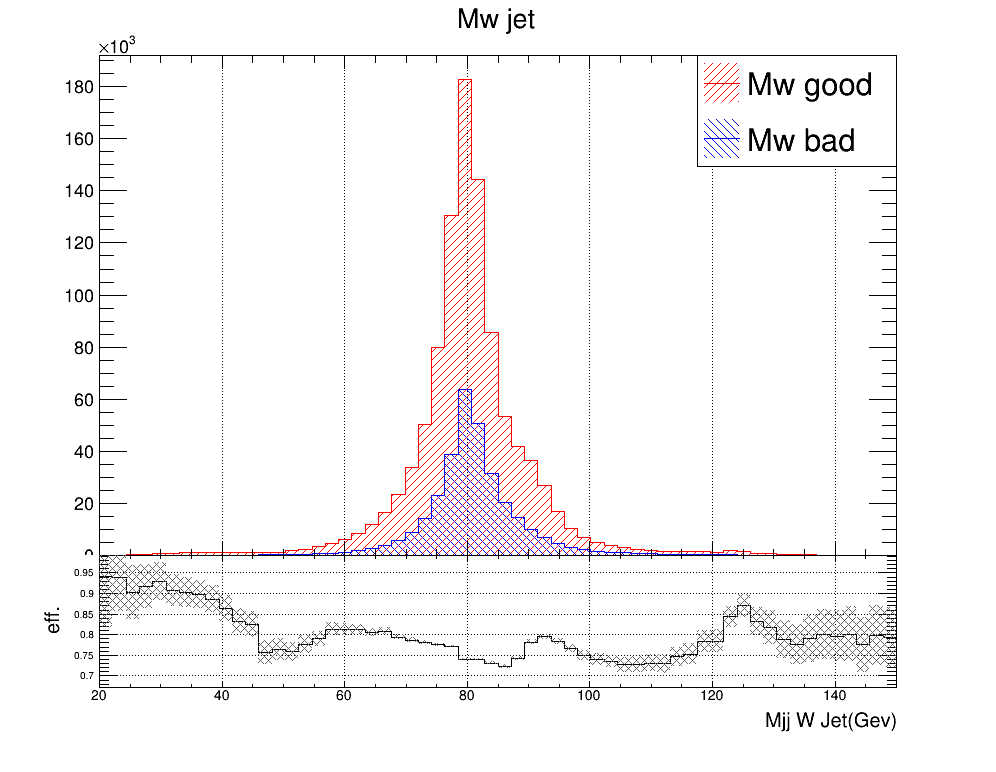

In [16]:
c1, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_mw.Draw("nostack hist")
legend = plotter.createLegend(h_mw, h_mw_bad, 1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_mw, h_mw +h_mw_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Mjj W Jet(Gev)")
hratio.GetXaxis().SetLabelSize(0.07)
c1.Draw()

In [17]:
print('efficiency')
print(h_mw.GetEntries()/(h_mw.GetEntries()+h_mw_bad.GetEntries()))

efficiency
0.7590409854073253


 FCN=39954.1 FROM MIGRAD    STATUS=CONVERGED     357 CALLS         358 TOTAL
                     EDM=4.87839e-08    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.6 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  k            1.85943e+05   3.09519e+02  -1.70454e-02  -1.57934e-06
   2  Gamma       -7.60418e+00   1.04738e-02  -5.19460e-05   2.24397e-02
   3  E0           7.98785e+01   5.64334e-03  -2.50344e-05  -4.70081e-02


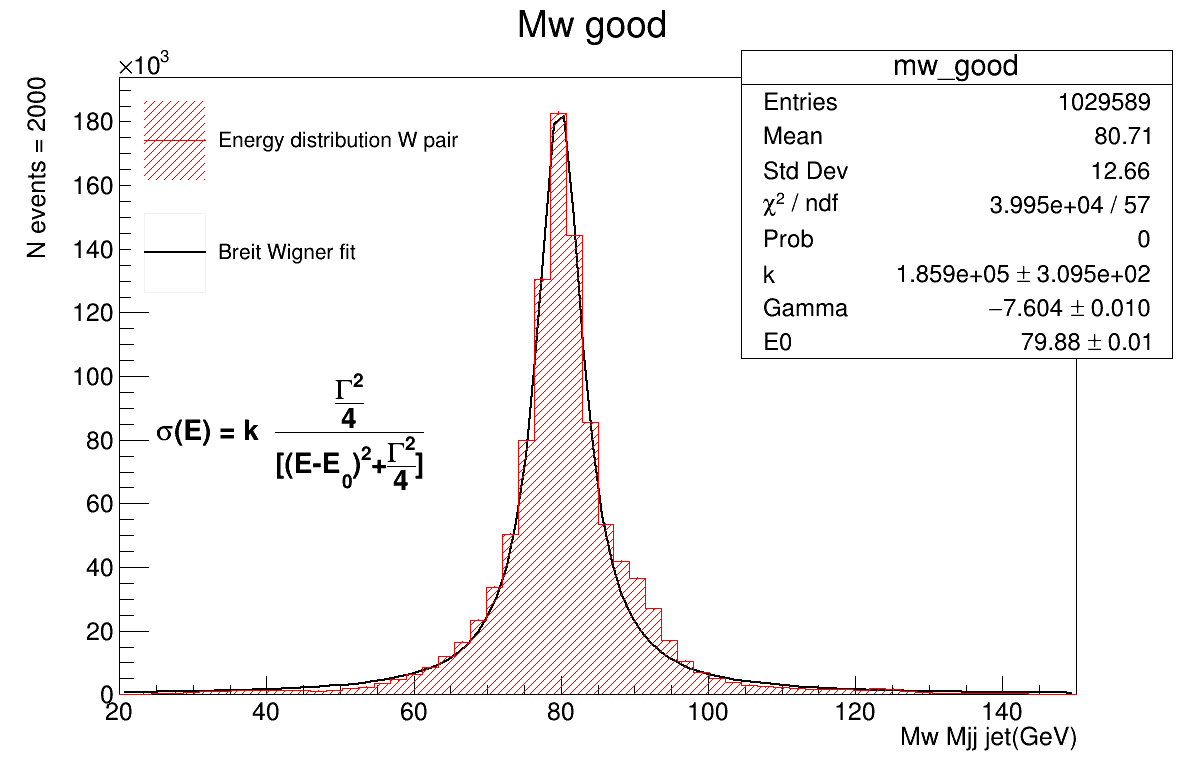

In [18]:
bw = r.TF1("fit", "[0]*(([1]^2)/4)/((x-[2])*(x-[2])+(([1]^2)/4))", 0, 150)
bw.SetParNames("k", "Gamma", "E0")
bw.SetLineColor(r.kBlack)
bw.SetLineStyle(1)
bw.SetLineWidth(2)
bw.SetParameters(0.0001, 150, 80, 0.5)
c2 = r.TCanvas("c2", "canvas", 50, 50, 1200, 800)
h_mw.Fit("fit","r")
h_mw.Draw("hist same")
h_mw.GetXaxis().SetTitle("Mw Mjj jet(GeV)")
h_mw.GetYaxis().SetTitle("N events = 2000")
l = r.TLegend(0.11,0.6,0.4,0.89)
l.AddEntry(h_mw, "Energy distribution W pair")
l.AddEntry(bw,"Breit Wigner fit")
l.SetTextSize(0.03)
l.SetBorderSize(0)
l.Draw()
c = r.TLatex(25,80000,"#sigma(E) = k #frac{#frac{#Gamma^{2}}{4}}{[(E-E_{0})^{2}+#frac{#Gamma^{2}}{4}]}")
c.SetTextSize(0.04)
c.Draw()
c2.Draw()

 FCN=23268.7 FROM MIGRAD    STATUS=CONVERGED     315 CALLS         316 TOTAL
                     EDM=2.46179e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.8 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  k            6.73006e+04   1.98909e+02   2.78734e+00  -7.56999e-06
   2  gamma       -6.41043e+00   1.54210e-02   2.14515e-04   8.77125e-02
   3  E0           8.03034e+01   9.08868e-03  -2.27924e-04  -9.64119e-03


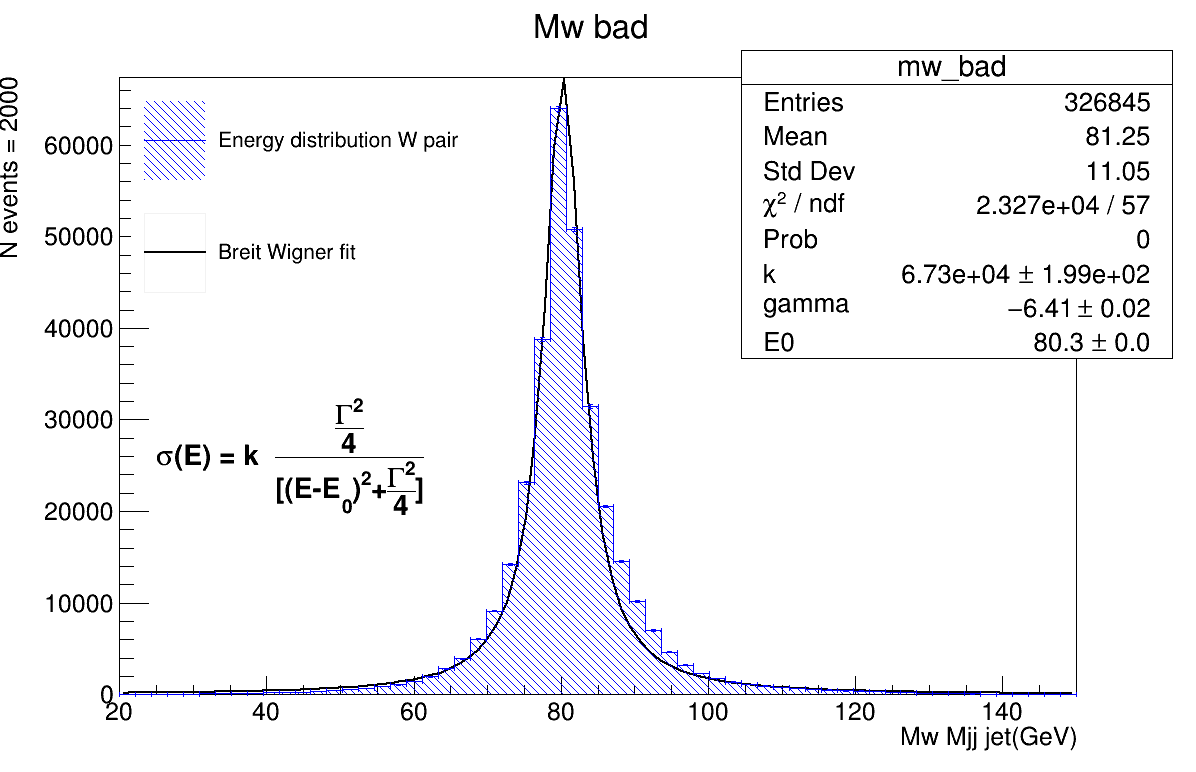

In [19]:
bw = r.TF1("fit", "[0]*([1]*[1]/4)/((x-[2])*(x-[2])+([1]*[1]/4))", 0, 150)
bw.SetParNames("k", "gamma", "E0")
bw.SetLineColor(r.kBlack)
bw.SetLineWidth(2)
bw.SetParameters(0.0001, 150, 80, 0.5)
c2 = r.TCanvas("c2", "canvas", 50, 50, 1200, 800)
h_mw_bad.Fit("fit","r")
h_mw_bad.Draw("hist E1 same")
h_mw_bad.GetXaxis().SetTitle("Mw Mjj jet(GeV)")
h_mw_bad.GetYaxis().SetTitle("N events = 2000")
l = r.TLegend(0.11,0.6,0.4,0.89)
l.AddEntry(h_mw_bad, "Energy distribution W pair")
l.AddEntry(bw,"Breit Wigner fit")
l.SetTextSize(0.03)
l.SetBorderSize(0)
l.Draw()
c = r.TLatex(25,25000,"#sigma(E) = k #frac{#frac{#Gamma^{2}}{4}}{[(E-E_{0})^{2}+#frac{#Gamma^{2}}{4}]}")
c.SetTextSize(0.04)
c.Draw()
c2.Draw()

# Max MJJ

In [49]:
hs_mjj = r.THStack("hs_mjj","Mjj jet");
h_mjj = r.TH1F("mjj_good", "Mjj good ", 60, 20, 3000 )
h_mjj.SetLineColor(r.kRed)
h_mjj.SetFillColor(r.kRed)
h_mjj.SetFillStyle(3004)
hs_mjj.Add(h_mjj)
h_mjj_bad = r.TH1F("mjj_bad ", "Mjj bad ", 60, 20, 3000 )
h_mjj_bad.SetLineColor(r.kBlue)
h_mjj_bad.SetFillColor(r.kBlue)
h_mjj_bad.SetFillStyle(3005)
hs_mjj.Add(h_mjj_bad)

In [50]:
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #jsel selettore di getti il cui metodo viene applicato anche ai partoni per creare le coppie
    partons_pair = jsel.tag_parton_pair(evento.partons)
    jets_pair = jsel.max_mjj_pair(evento.jets)
    associazione = JetTagging.check_association(evento, partons_pair, [evento.jets[i] for i in jets_pair])
    if associazione:
        #se l'associazione va a buon fine restituisce TRUE e riempio l'histo con la massa dei due getti
            h_mjj.Fill( (evento.jets[jets_pair[0]]+ evento.jets[jets_pair[1]]).M())
    else :
            h_mjj_bad.Fill((evento.jets[jets_pair[0]]+ evento.jets[jets_pair[1]]).M())
            

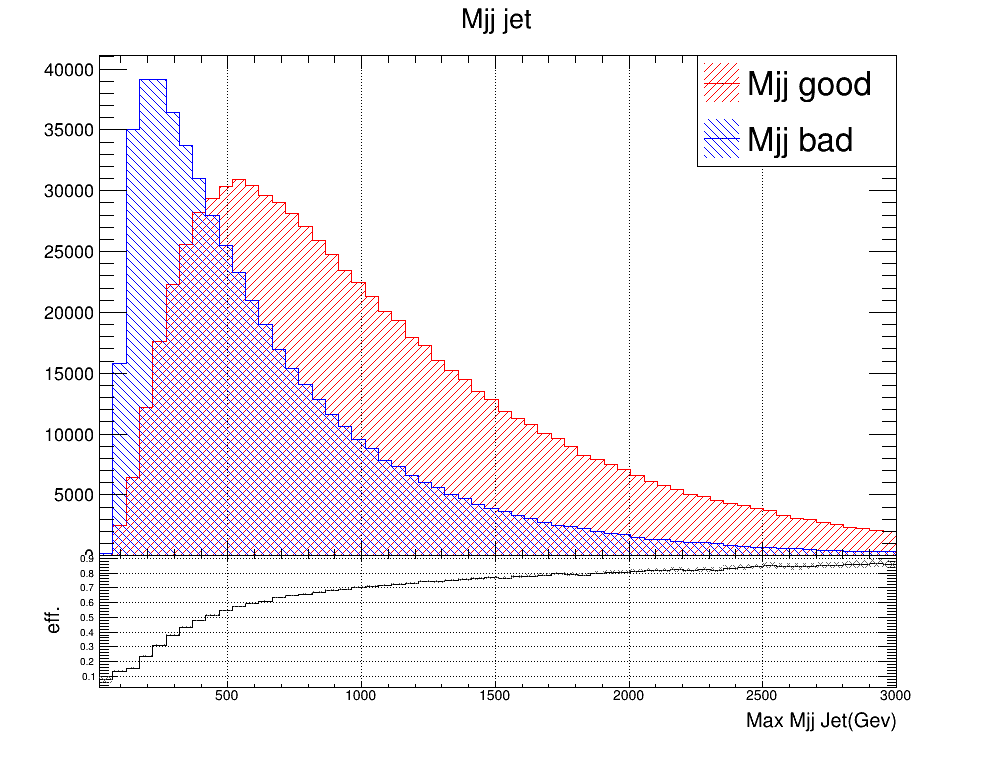

In [51]:
c1, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_mjj.Draw("nostack hist")
legend = plotter.createLegend(h_mjj, h_mjj_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_mjj, h_mjj +h_mjj_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Max Mjj Jet(Gev)")
hratio.GetXaxis().SetLabelSize(0.07)
c1.Draw()

In [52]:
print('efficiency')
print((h_mjj.GetEntries())/(h_mjj.GetEntries()+h_mjj_bad.GetEntries()))

efficiency
0.5996414127041935


# Max Deltaeta

In [11]:
hs_deltaeta = r.THStack("hs_deltaeta","Mjj maxeta jet");
h_deltaeta = r.TH1F("mjj_deltaeta_good", "Mjj maxeta good ", 60, 20, 3000 )
h_deltaeta.SetLineColor(r.kRed)
h_deltaeta.SetFillColor(r.kRed)
h_deltaeta.SetFillStyle(3004)
hs_deltaeta.Add(h_deltaeta)
h_deltaeta_bad = r.TH1F("mjj_deltaeta_bad ", "Mjj maxeta bad ", 60, 20, 3000 )
h_deltaeta_bad.SetLineColor(r.kBlue)
h_deltaeta_bad.SetFillColor(r.kBlue)
h_deltaeta_bad.SetFillStyle(3005)
hs_deltaeta.Add(h_deltaeta_bad)

In [12]:
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #jsel selettore di getti il cui metodo viene applicato anche ai partoni per creare le coppie
    partons_pair = jsel.tag_parton_pair(evento.partons)
    jets_pair = jsel.max_deltaeta_pair(evento.jets)
    associazione = JetTagging.check_association(evento, partons_pair, [evento.jets[i] for i in jets_pair])
    if associazione:
        #se l'associazione va a buon fine restituisce TRUE e riempio l'histo con la massa dei due getti
            h_deltaeta.Fill( (evento.jets[jets_pair[0]]+ evento.jets[jets_pair[1]]).M())
    else :
        #se l'associazione non va a buon fine restituisce FALSE e inserisco nel secondo histo la massa dei due getti
            h_deltaeta_bad.Fill((evento.jets[jets_pair[0]]+ evento.jets[jets_pair[1]]).M()) 

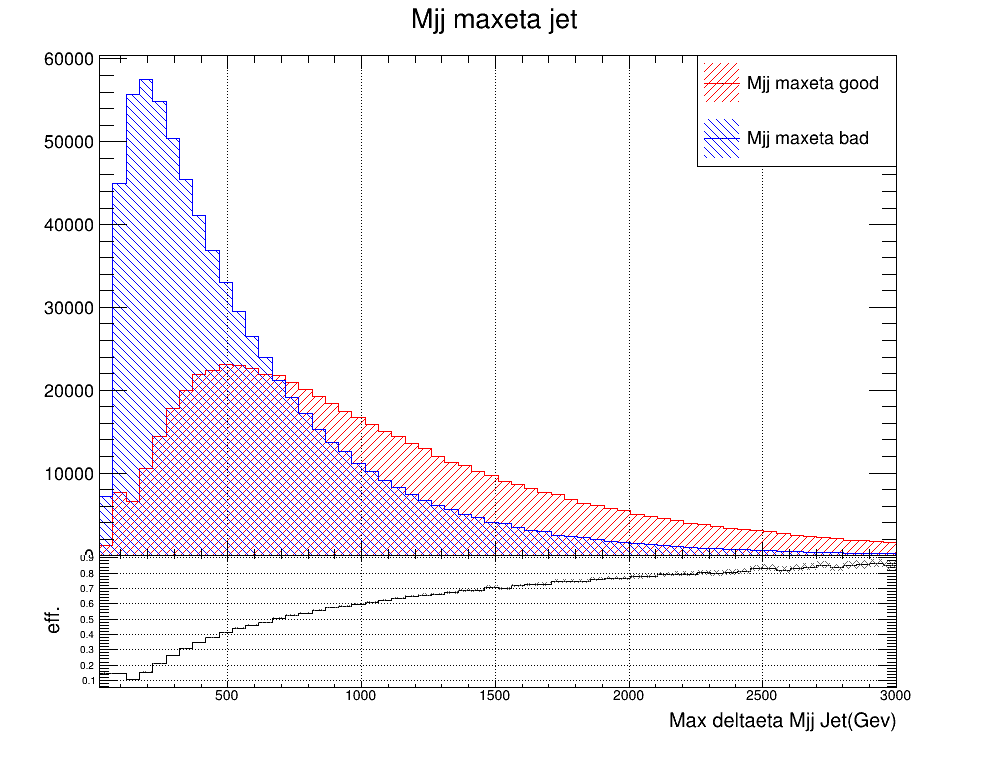

In [13]:
c1, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_deltaeta.Draw("nostack hist")
legend = plotter.createLegend(h_deltaeta, h_deltaeta_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_deltaeta, h_deltaeta +h_deltaeta_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Max deltaeta Mjj Jet(Gev)")
hratio.GetXaxis().SetLabelSize(0.07)
c1.Draw()

In [14]:
print('efficiency')
print(h_deltaeta.GetEntries()/(h_deltaeta.GetEntries()+h_deltaeta_bad.GetEntries()))

efficiency
0.46391641613229984


# MINDELTAETA

In [15]:
hs_deltaeta = r.THStack("hs_deltaeta","Mjj mineta jet");
h_deltaeta = r.TH1F("mjj_deltaeta_good", "Mjj mineta good ", 60, 20, 150 )
h_deltaeta.SetLineColor(r.kRed)
h_deltaeta.SetFillColor(r.kRed)
h_deltaeta.SetFillStyle(3004)
hs_deltaeta.Add(h_deltaeta)
h_deltaeta_bad = r.TH1F("mjj_deltaeta_bad ", "Mjj mineta bad ", 60, 20, 150 )
h_deltaeta_bad.SetLineColor(r.kBlue)
h_deltaeta_bad.SetFillColor(r.kBlue)
h_deltaeta_bad.SetFillStyle(3005)
hs_deltaeta.Add(h_deltaeta_bad)

hs_mindeltaeta = r.THStack("hs_deltaeta","eta mineta jet");
h_mindeltaeta = r.TH1F("eta_deltaeta_good", "eta mineta good ", 60, -3, 3 )
h_mindeltaeta.SetLineColor(r.kRed)
h_mindeltaeta.SetFillColor(r.kRed)
h_mindeltaeta.SetFillStyle(3004)
hs_mindeltaeta.Add(h_mindeltaeta)
h_mindeltaeta_bad = r.TH1F("eta_deltaeta_bad ", "eta mineta bad ", 60, -3, 3 )
h_mindeltaeta_bad.SetLineColor(r.kBlue)
h_mindeltaeta_bad.SetFillColor(r.kBlue)
h_mindeltaeta_bad.SetFillStyle(3005)
hs_mindeltaeta.Add(h_mindeltaeta_bad)

hjets = r.TH1F("hjets","number of jets in bad events",10,0,10)
hjets.SetLineColor(r.kBlack)
hjets.SetFillColor(r.kBlack)
hjets.SetFillStyle(3003)

hjets1 = r.TH1F("hjets","number of jets in good events",10,0,10)
hjets1.SetLineColor(r.kBlack)
hjets1.SetFillColor(r.kBlack)
hjets1.SetFillStyle(3003)

In [16]:
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #jsel selettore di getti il cui metodo viene applicato anche ai partoni per creare le coppie
    partons_pair = jsel.nearest_W_pair(evento.partons)
    jets_pair = jsel.min_deltaeta_pair(evento.jets)
    associazione = JetTagging.check_association(evento, partons_pair, [evento.jets[i] for i in jets_pair])
    if associazione:
        #se l'associazione va a buon fine restituisce TRUE e riempio l'histo con la massa dei due getti
            h_deltaeta.Fill( (evento.jets[jets_pair[0]]+ evento.jets[jets_pair[1]]).M())
            h_mindeltaeta.Fill(evento.jets[jets_pair[0]].Eta()- evento.jets[jets_pair[1]].Eta())
            hjets1.Fill(evento.n_jets[0])
    else :
        #se l'associazione non va a buon fine restituisce FALSE e inserisco nel secondo histo la massa dei due getti
            h_deltaeta_bad.Fill((evento.jets[jets_pair[0]]+ evento.jets[jets_pair[1]]).M()) 
            h_mindeltaeta_bad.Fill(evento.jets[jets_pair[0]].Eta()- evento.jets[jets_pair[1]].Eta()) 
            hjets.Fill(evento.n_jets[0])

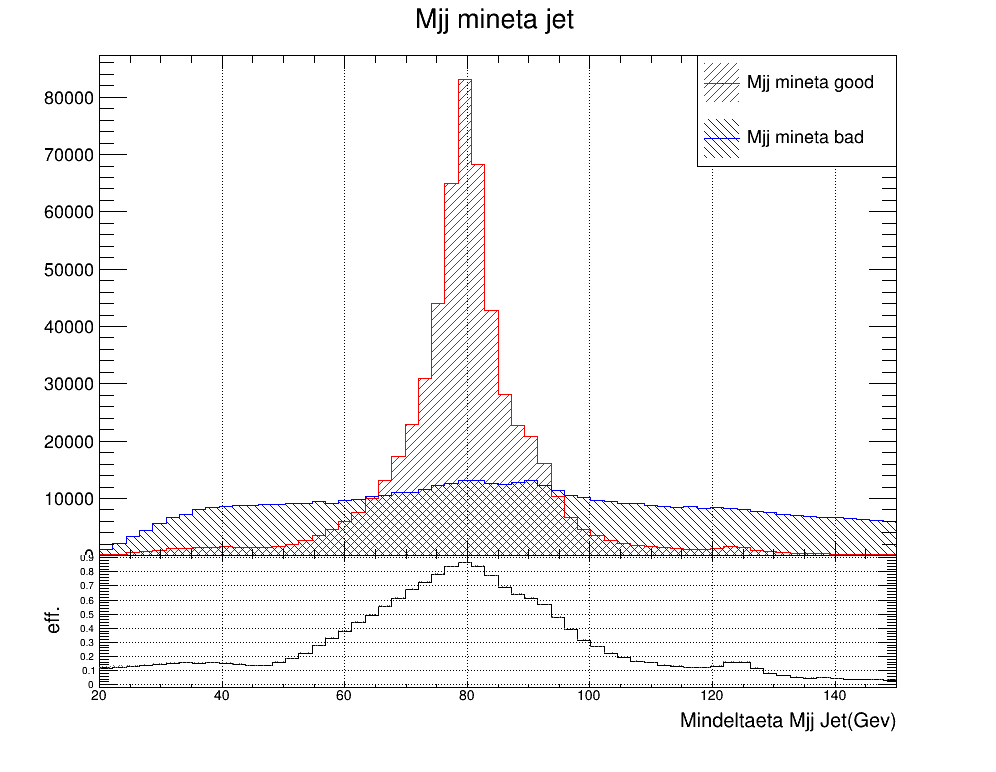

In [17]:
c1, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_deltaeta.Draw("nostack hist")
legend = plotter.createLegend(h_deltaeta, h_deltaeta_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_deltaeta, h_deltaeta +h_deltaeta_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Mindeltaeta Mjj Jet(Gev)")
hratio.GetXaxis().SetLabelSize(0.07)
c1.Draw()

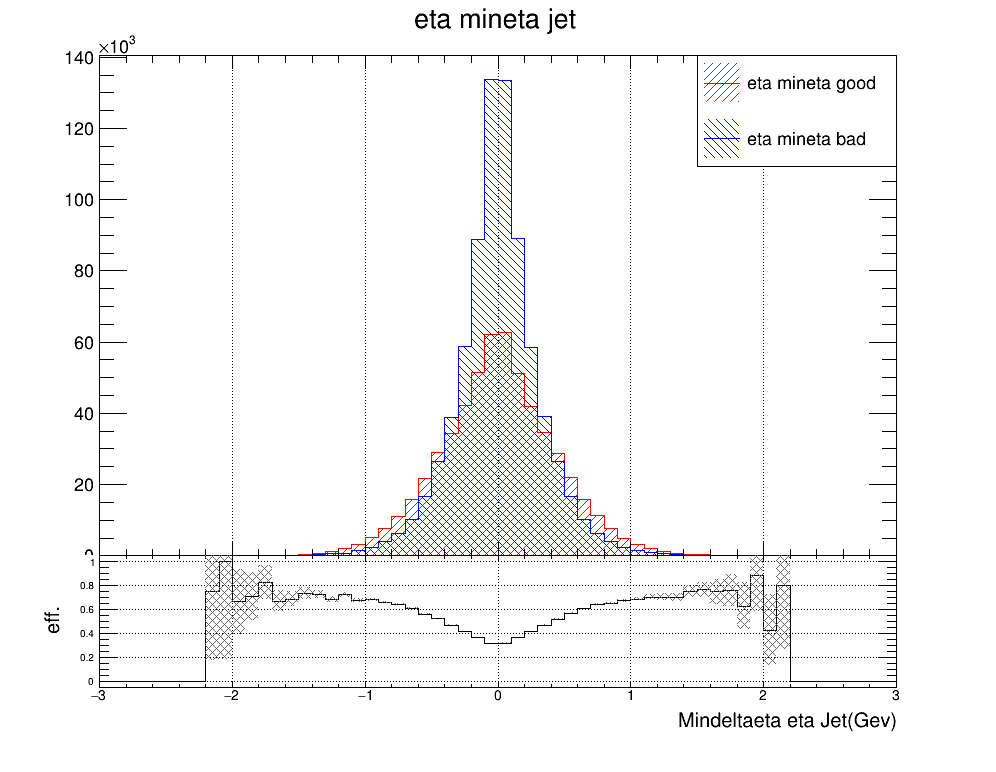

In [18]:
c1, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_mindeltaeta.Draw("nostack hist")
legend = plotter.createLegend(h_mindeltaeta, h_mindeltaeta_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_mindeltaeta, h_mindeltaeta +h_mindeltaeta_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Mindeltaeta eta Jet(Gev)")
hratio.GetXaxis().SetLabelSize(0.07)
c1.Draw()

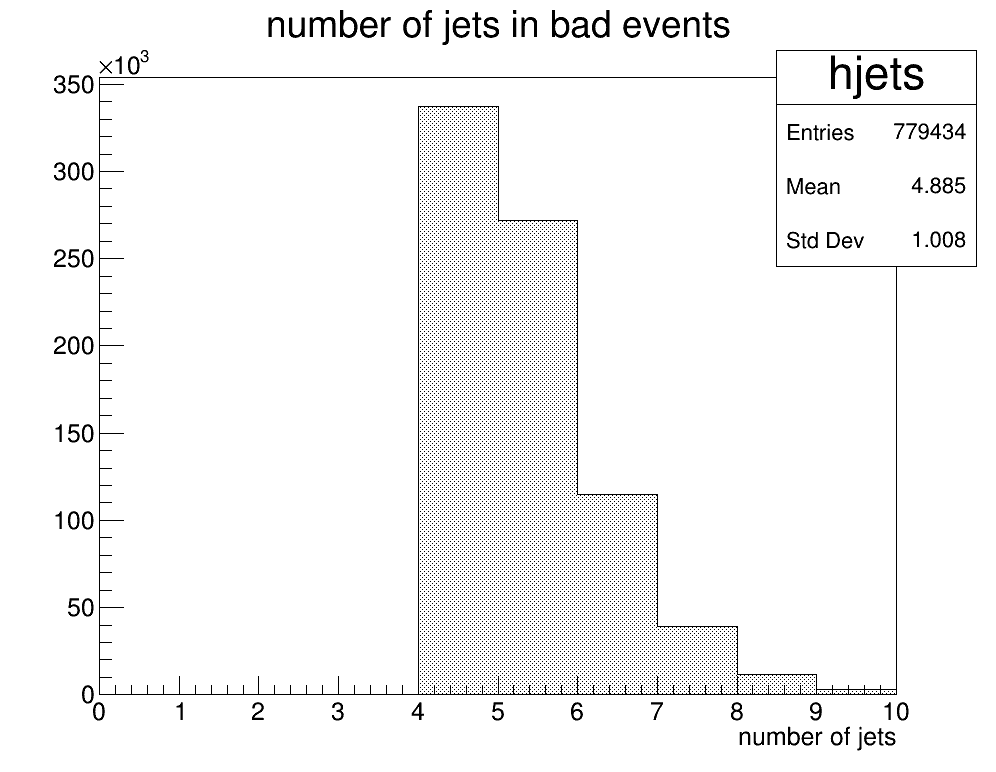

In [19]:
c4 = r.TCanvas("c4","canvas", 50, 50, 1000, 800)
hjets.Draw("hist")
hjets.GetXaxis().SetTitle("number of jets")
c4.Draw()

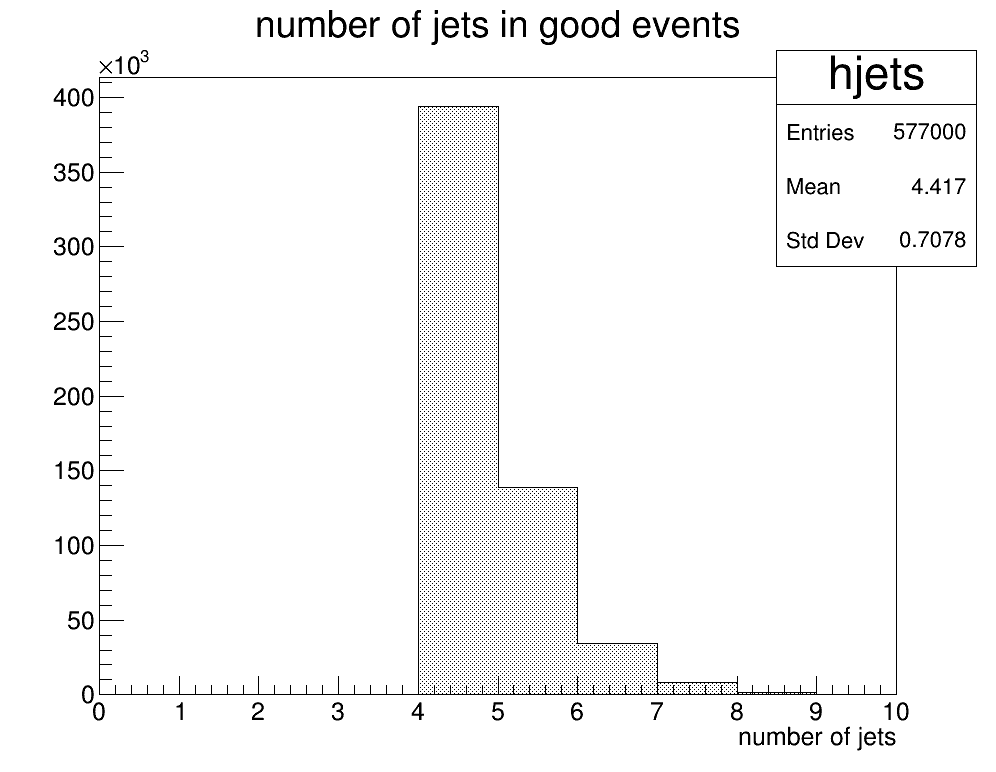

In [20]:
c5 = r.TCanvas("c4","canvas", 50, 50, 1000, 800)
hjets1.Draw("hist")
hjets1.GetXaxis().SetTitle("number of jets")
c5.Draw()

In [21]:
print('efficiency')
print(h_deltaeta.GetEntries()/(h_deltaeta.GetEntries()+h_deltaeta_bad.GetEntries()))
print(h_mindeltaeta.GetEntries()/(h_mindeltaeta.GetEntries()+h_mindeltaeta_bad.GetEntries()))

efficiency
0.4253800774678311
0.4253800774678311


# MAX PT 

In [23]:
hs_pt = r.THStack("hs_pt","Mjj maxpt jet");
h_pt = r.TH1F("mjj_pt_good", "Mjj maxpt good ", 60, 20, 150 )
h_pt.SetLineColor(r.kRed)
h_pt.SetFillColor(r.kRed)
h_pt.SetFillStyle(3004)
hs_pt.Add(h_pt)
h_pt_bad = r.TH1F("mjj_pt_bad ", "Mjj maxpt bad ", 60, 20, 150 )
h_pt_bad.SetLineColor(r.kBlue)
h_pt_bad.SetFillColor(r.kBlue)
h_pt_bad.SetFillStyle(3005)
hs_pt.Add(h_pt_bad)

In [24]:
hs_ptd = r.THStack("hs_pt","maxpt jet");
h_ptd = r.TH1F("pt_good", "maxpt good ", 60, 20, 1300 )
h_ptd.SetLineColor(r.kRed)
h_ptd.SetFillColor(r.kRed)
h_ptd.SetFillStyle(3004)
hs_ptd.Add(h_ptd)
h_ptd_bad = r.TH1F("pt_bad ", "maxpt bad ", 60, 20, 1300 )
h_ptd_bad.SetLineColor(r.kBlue)
h_ptd_bad.SetFillColor(r.kBlue)
h_ptd_bad.SetFillStyle(3005)
hs_ptd.Add(h_ptd_bad)

In [25]:
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #jsel selettore di getti il cui metodo viene applicato anche ai partoni per creare le coppie
    partons_pair = jsel.nearest_W_pair(evento.partons)
    jets_pair = jsel.max_pt_pair(evento.jets)
    associazione = JetTagging.check_association(evento, partons_pair, [evento.jets[i] for i in jets_pair])
    if associazione:
        #se l'associazione va a buon fine restituisce TRUE e riempio l'histo con la massa dei due getti
            h_pt.Fill( (evento.jets[jets_pair[0]]+ evento.jets[jets_pair[1]]).M())
            h_ptd.Fill( (evento.jets[jets_pair[0]]+ evento.jets[jets_pair[1]]).Pt())
    else :
        #se l'associazione non va a buon fine restituisce FALSE e inserisco nel secondo histo la massa dei due getti
            h_pt_bad.Fill((evento.jets[jets_pair[0]]+ evento.jets[jets_pair[1]]).M()) 
            h_ptd_bad.Fill((evento.jets[jets_pair[0]]+ evento.jets[jets_pair[1]]).Pt()) 

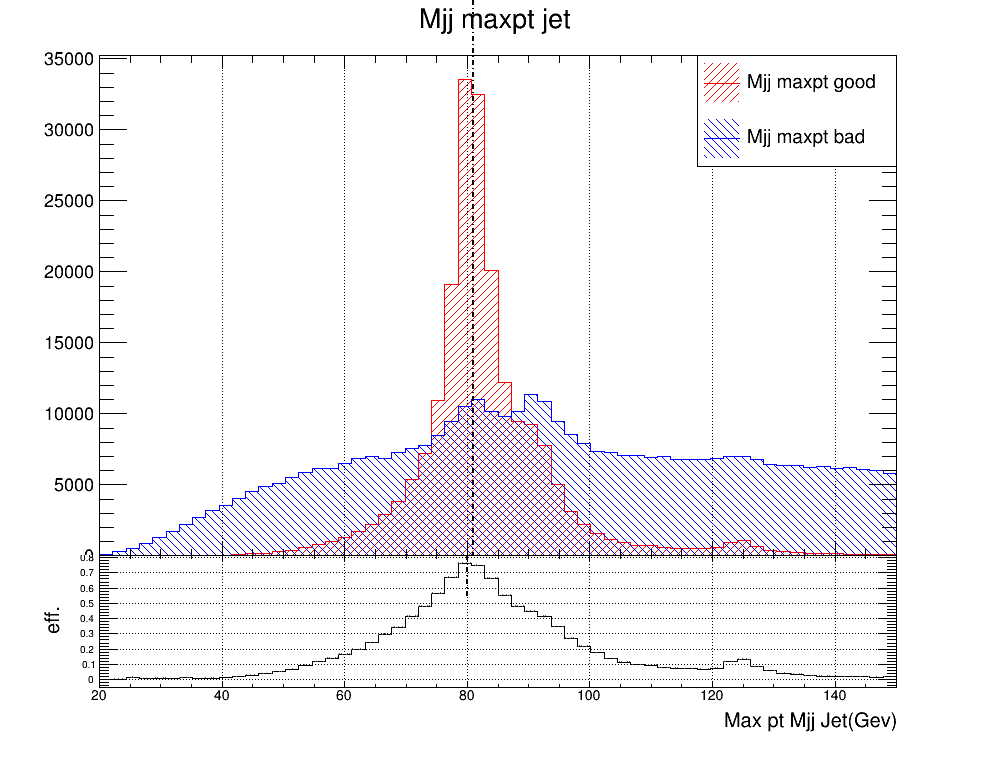

In [26]:
c1, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_pt.Draw("nostack hist")
legend = plotter.createLegend(h_pt, h_pt_bad,1)
legend.Draw()
j=r.TLine(81,0,81,151000)
j.SetLineStyle(5)
j.SetLineColor(r.kBlack)
j.SetLineWidth(2)
j.Draw("same") 
pad2.cd()
hratio = plotter.createRatio(h_pt, h_pt +h_pt_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Max pt Mjj Jet(Gev)")
hratio.GetXaxis().SetLabelSize(0.07)
l=r.TLine(80,0.53,80,0.86)
l.SetLineStyle(5)
l.SetLineColor(r.kBlack)
l.SetLineWidth(2)
l.Draw("same") 
c1.Draw()

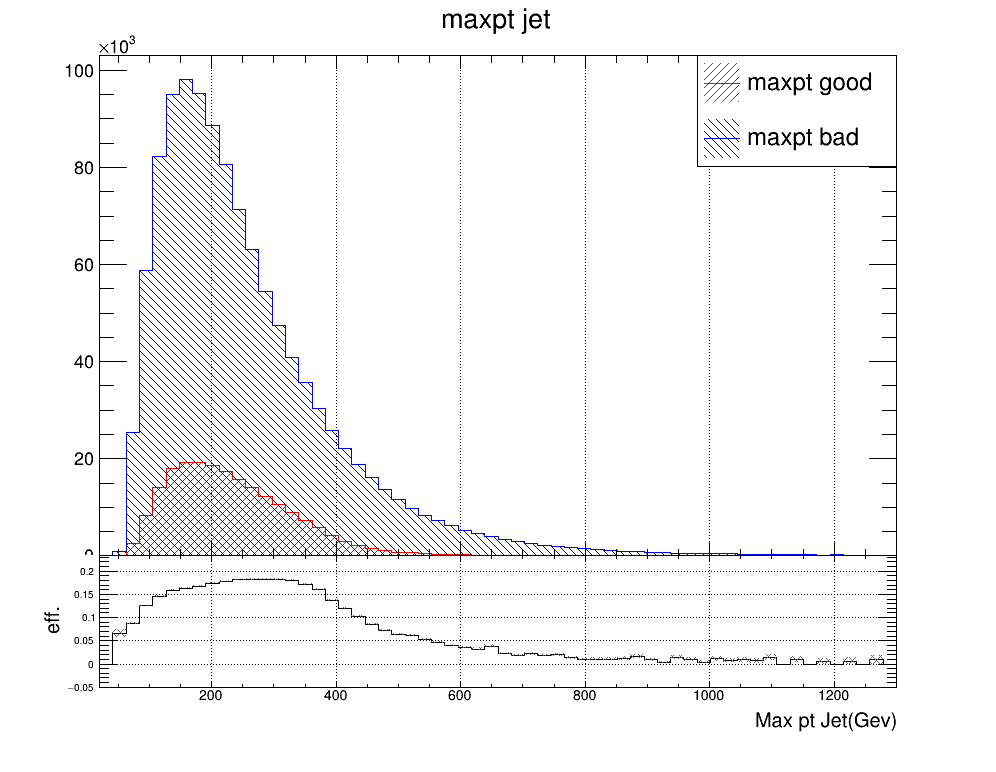

In [27]:
c1, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_ptd.Draw("nostack hist")
legend = plotter.createLegend(h_ptd, h_ptd_bad,1)
legend.Draw() 
pad2.cd()
hratio = plotter.createRatio(h_ptd, h_ptd +h_ptd_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Max pt Jet(Gev)")
hratio.GetXaxis().SetLabelSize(0.07) 
c1.Draw()

In [28]:
print('efficiency')
print(h_pt.GetEntries()/(h_pt.GetEntries()+h_pt_bad.GetEntries()))

efficiency
0.15276747707592112


# Min_pt Questo è sbagliato

In [52]:
hs_pt = r.THStack("hs_pt","Mjj minPt jet");
h_pt = r.TH1F("mjj_pt_good", "Mjj minpt good ", 60, 20, 1000 )
h_pt.SetLineColor(r.kRed)
h_pt.SetFillColor(r.kRed)
h_pt.SetFillStyle(3004)
hs_pt.Add(h_pt)
h_pt_bad = r.TH1F("mjj_pt_bad ", "Mjj minpt bad ", 60, 20, 1000 )
h_pt_bad.SetLineColor(r.kBlue)
h_pt_bad.SetFillColor(r.kBlue)
h_pt_bad.SetFillStyle(3005)
hs_pt.Add(h_pt_bad)

In [53]:
hs1_pt = r.THStack("hs_pt","Pt minPt jet");
h1_pt = r.TH1F("pt_pt_good", "Pt minpt good ", 60, 20, 300 )
h1_pt.SetLineColor(r.kRed)
h1_pt.SetFillColor(r.kRed)
h1_pt.SetFillStyle(3004)
hs1_pt.Add(h1_pt)
h1_pt_bad = r.TH1F("pt_pt_bad ", "Pt minpt bad ", 60, 20, 300 )
h1_pt_bad.SetLineColor(r.kBlue)
h1_pt_bad.SetFillColor(r.kBlue)
h1_pt_bad.SetFillStyle(3005)
hs1_pt.Add(h1_pt_bad)

In [54]:
hjets = r.TH1F("hjets","number of jets in bad events",10,0,10)
hjets.SetLineColor(r.kBlack)
hjets.SetFillColor(r.kBlack)
hjets.SetFillStyle(3003)

In [55]:
hjets1 = r.TH1F("hjets","number of jets in good events",10,0,10)
hjets1.SetLineColor(r.kBlack)
hjets1.SetFillColor(r.kBlack)
hjets1.SetFillStyle(3003)

In [56]:
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #jsel selettore di getti il cui metodo viene applicato anche ai partoni per creare le coppie
    partons_pair = jsel.min_pt_pair(evento.partons)
    jets_pair = jsel.min_pt_pair(evento.jets)
    associazione = JetTagging.check_association(evento, partons_pair, [evento.jets[i] for i in jets_pair])
    if associazione:
        #se l'associazione va a buon fine restituisce TRUE e riempio l'histo con la massa dei due getti
            h1_pt.Fill( (evento.jets[jets_pair[0]]+ evento.jets[jets_pair[1]]).Pt())
            h_pt.Fill( (evento.jets[jets_pair[0]]+ evento.jets[jets_pair[1]]).M())
            hjets1.Fill(evento.n_jets[0])
    else :
        #se l'associazione non va a buon fine restituisce FALSE e inserisco nel secondo histo la massa dei due getti
            h1_pt_bad.Fill((evento.jets[jets_pair[0]]+ evento.jets[jets_pair[1]]).Pt()) 
            h_pt_bad.Fill((evento.jets[jets_pair[0]]+ evento.jets[jets_pair[1]]).M())
            hjets.Fill(evento.n_jets[0])

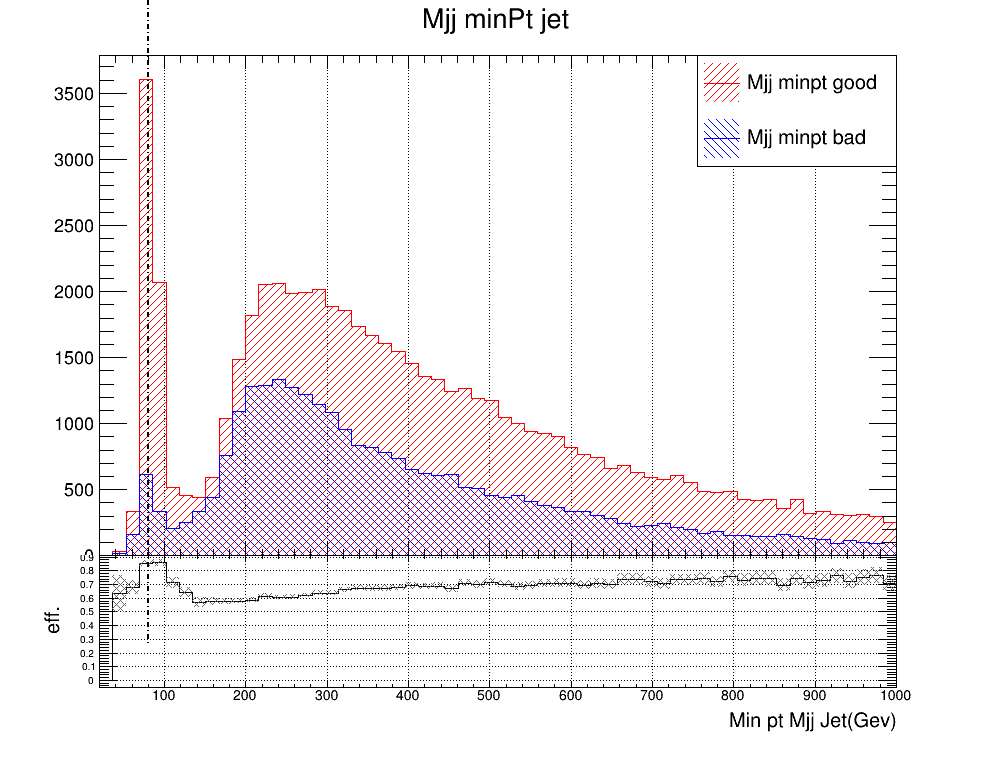

In [57]:
c1, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_pt.Draw("nostack hist")
legend = plotter.createLegend(h_pt, h_pt_bad,1)
legend.Draw()
j=r.TLine(80,0,80,151000)
j.SetLineStyle(5)
j.SetLineColor(r.kBlack)
j.SetLineWidth(2)
j.Draw("same") 
pad2.cd()
hratio = plotter.createRatio(h_pt, h_pt +h_pt_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Min pt Mjj Jet(Gev)")
hratio.GetXaxis().SetLabelSize(0.07)
l=r.TLine(80,0.27,80,0.86)
l.SetLineStyle(5)
l.SetLineColor(r.kBlack)
l.SetLineWidth(2)
l.Draw("same") 
c1.Draw()

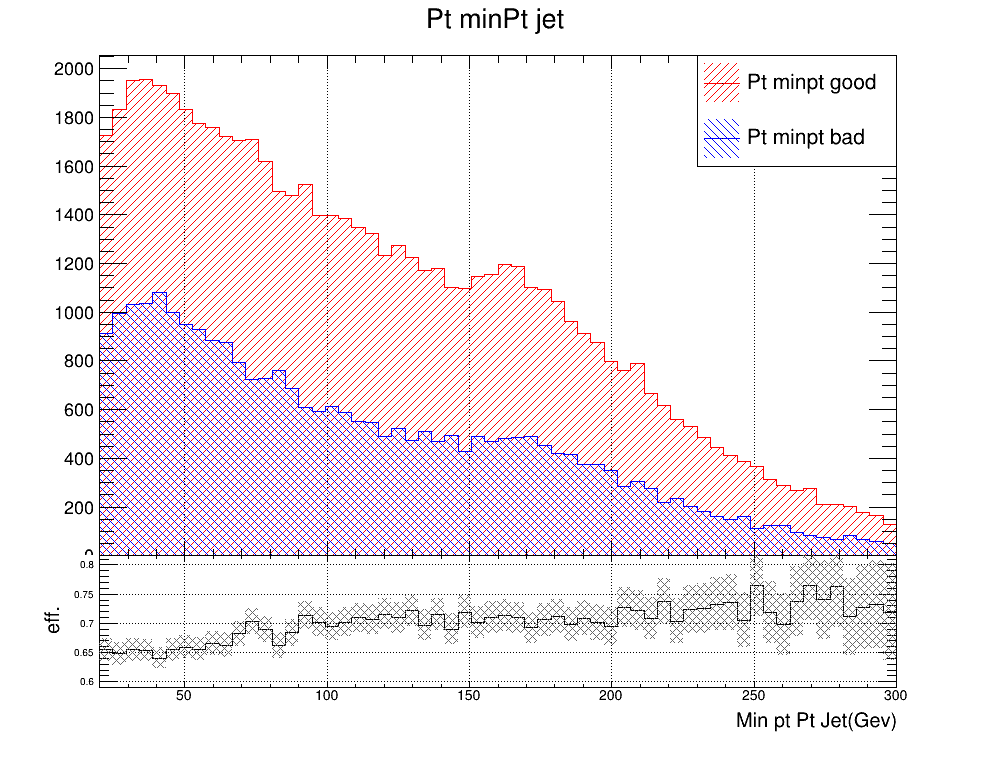

In [58]:
c2, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs1_pt.Draw("nostack hist")
legend = plotter.createLegend(h1_pt, h1_pt_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h1_pt, h1_pt +h1_pt_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Min pt Pt Jet(Gev)")
hratio.GetXaxis().SetLabelSize(0.07)
c2.Draw()

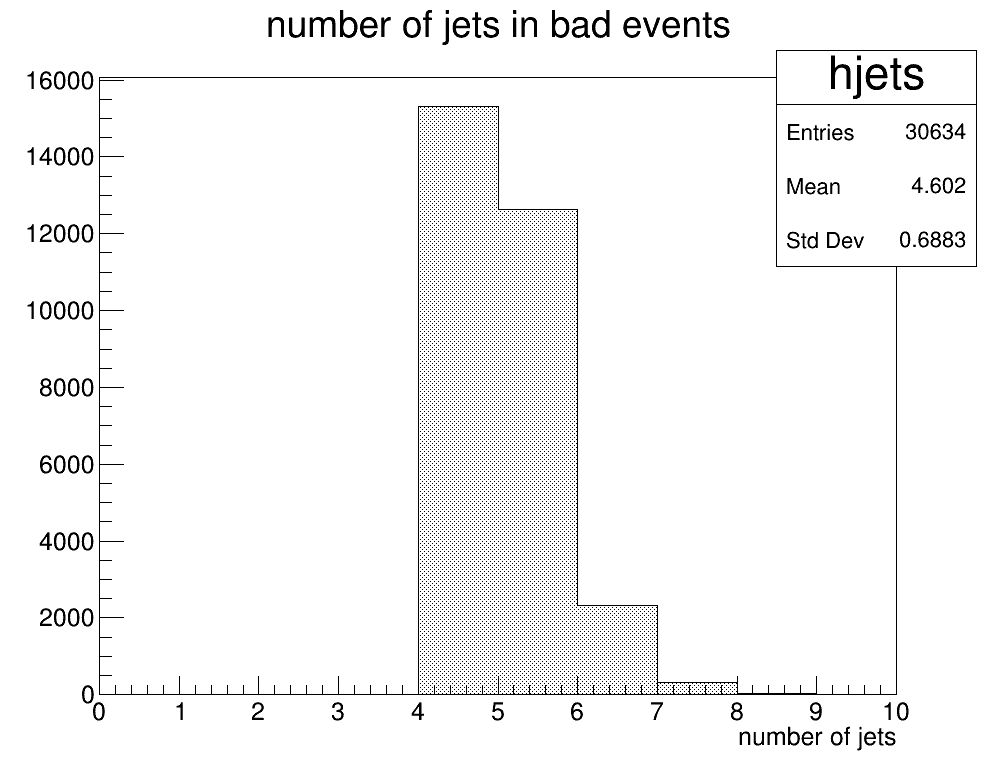

In [59]:
c4 = r.TCanvas("c4","canvas", 50, 50, 1000, 800)
hjets.Draw("hist")
hjets.GetXaxis().SetTitle("number of jets")
c4.Draw()

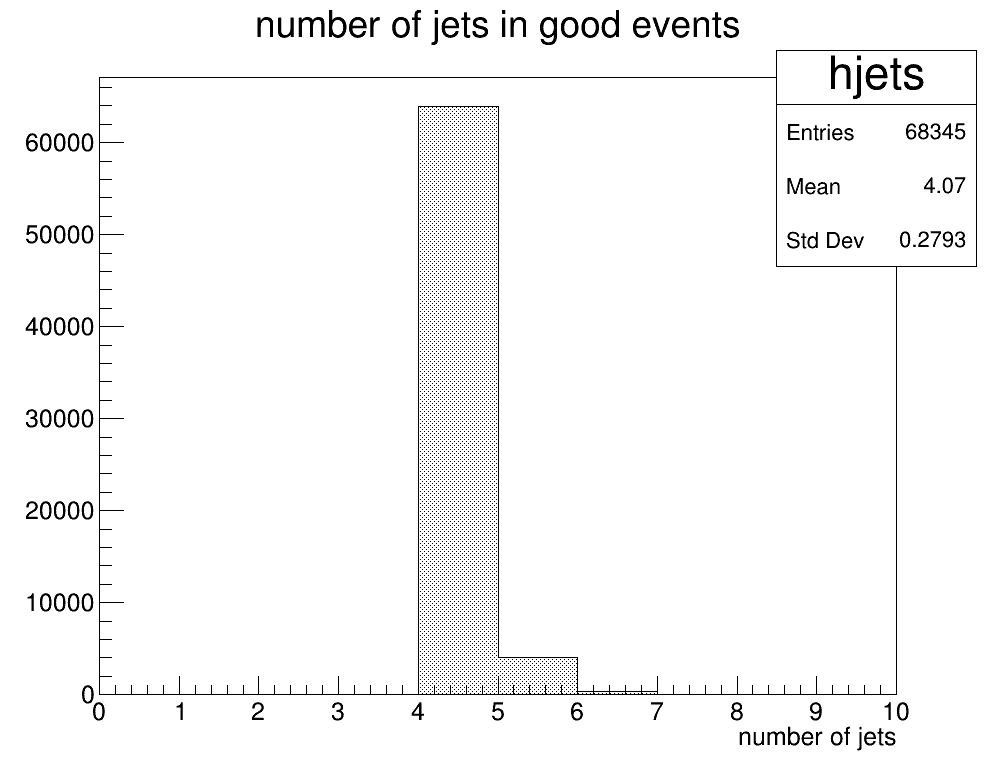

In [60]:
c4 = r.TCanvas("c4","canvas", 50, 50, 1000, 800)
hjets1.Draw("hist")
hjets1.GetXaxis().SetTitle("number of jets")
c4.Draw()

In [61]:
print('efficiency')
print(h_pt.GetEntries()/(h_pt.GetEntries()+h_pt_bad.GetEntries()))

efficiency
0.6905000050515766


# COMPOSITE SELECTION

composing characteristic of the tag and W jets to get better efficiency when checking jets/parton association

# Composing Max Deltaeta and Mjj

In [29]:
hs_pt = r.THStack("hs_pt","Mjj minPt jet");
h_pt = r.TH1F("mjj_pt_good", "Mjj minpt good ", 60, 20, 3000 )
h_pt.SetLineColor(r.kRed)
h_pt.SetFillColor(r.kRed)
h_pt.SetFillStyle(3004)
hs_pt.Add(h_pt)
h_pt_bad = r.TH1F("mjj_pt_bad ", "Mjj minpt bad ", 60, 20, 3000 )
h_pt_bad.SetLineColor(r.kBlue)
h_pt_bad.SetFillColor(r.kBlue)
h_pt_bad.SetFillStyle(3005)
hs_pt.Add(h_pt_bad)

In [30]:
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #jsel selettore di getti il cui metodo viene applicato anche ai partoni per creare le coppie
    partons_pair = jsel.tag_parton_pair(evento.partons)
    jets_pair = jsel.deltaeta_mjj_pair(evento.jets)
    associazione = JetTagging.check_association(evento, partons_pair, [evento.jets[i] for i in jets_pair])
    if associazione:
        #se l'associazione va a buon fine restituisce TRUE e riempio l'histo con la massa dei due getti
            h_pt.Fill( (evento.jets[jets_pair[0]]+ evento.jets[jets_pair[1]]).M())
    else :
        #se l'associazione non va a buon fine restituisce FALSE e inserisco nel secondo histo la massa dei due getti
            h_pt_bad.Fill((evento.jets[jets_pair[0]]+ evento.jets[jets_pair[1]]).M()) 

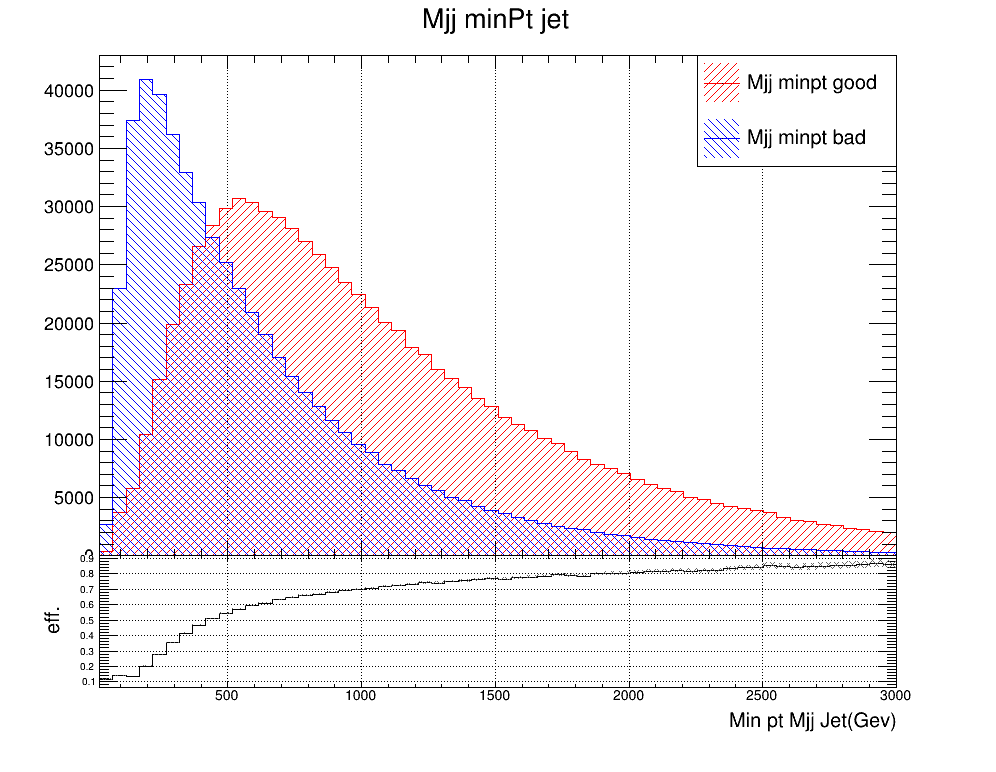

In [31]:
c1, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_pt.Draw("nostack hist")
legend = plotter.createLegend(h_pt, h_pt_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_pt, h_pt +h_pt_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Min pt Mjj Jet(Gev)")
hratio.GetXaxis().SetLabelSize(0.07)
c1.Draw()

In [32]:
print('efficiency')
print(h_pt.GetEntries()/(h_pt.GetEntries()+h_pt_bad.GetEntries()))

efficiency
0.5912126944620969


# Composing Nearest W and MinDeltaeta

In [33]:
hs_pt = r.THStack("hs_pt","Mjj minPt jet");
h_pt = r.TH1F("mjj_pt_good", "Mjj minpt good ", 60, 20, 150 )
h_pt.SetLineColor(r.kRed)
h_pt.SetFillColor(r.kRed)
h_pt.SetFillStyle(3004)
hs_pt.Add(h_pt)
h_pt_bad = r.TH1F("mjj_pt_bad ", "Mjj minpt bad ", 60, 20, 150 )
h_pt_bad.SetLineColor(r.kBlue)
h_pt_bad.SetFillColor(r.kBlue)
h_pt_bad.SetFillStyle(3005)
hs_pt.Add(h_pt_bad)

In [34]:
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #jsel selettore di getti il cui metodo viene applicato anche ai partoni per creare le coppie
    partons_pair = jsel.nearest_W_pair(evento.partons)
    jets_pair = jsel.deltaeta_mw_pair(evento.jets)
    associazione = JetTagging.check_association(evento, partons_pair, [evento.jets[i] for i in jets_pair])
    if associazione:
        #se l'associazione va a buon fine restituisce TRUE e riempio l'histo con la massa dei due getti
            h_pt.Fill( (evento.jets[jets_pair[0]]+ evento.jets[jets_pair[1]]).M())
    else :
        #se l'associazione non va a buon fine restituisce FALSE e inserisco nel secondo histo la massa dei due getti
            h_pt_bad.Fill((evento.jets[jets_pair[0]]+ evento.jets[jets_pair[1]]).M()) 

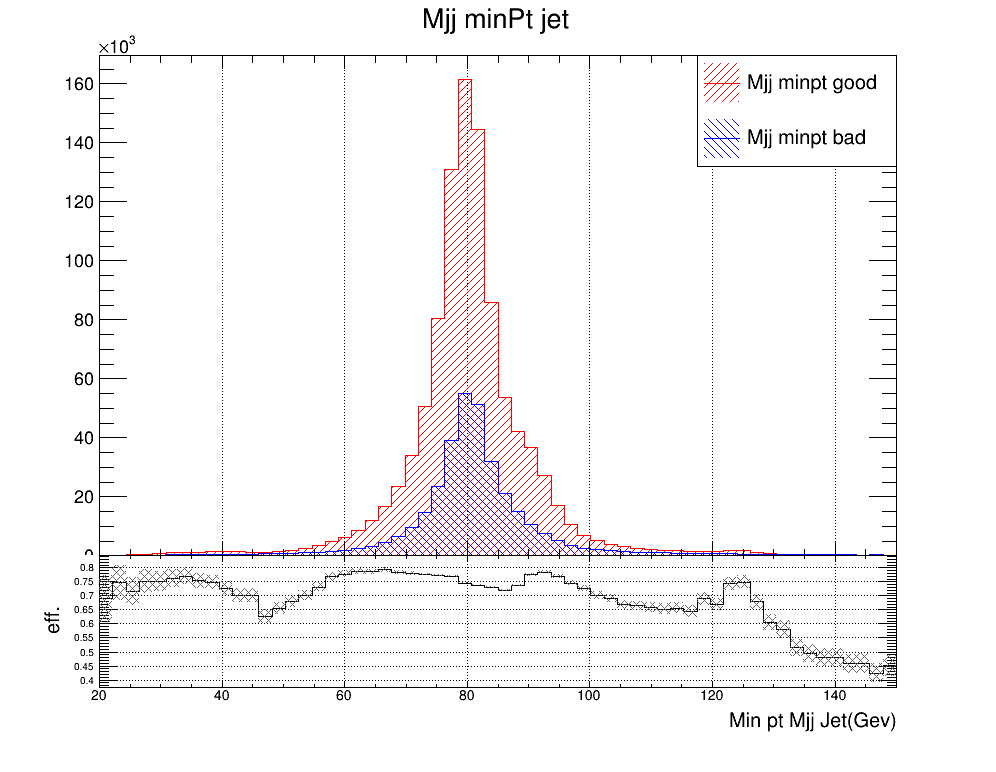

In [35]:
c1, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_pt.Draw("nostack hist")
legend = plotter.createLegend(h_pt, h_pt_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_pt, h_pt +h_pt_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Min pt Mjj Jet(Gev)")
hratio.GetXaxis().SetLabelSize(0.07)
c1.Draw()

In [36]:
print('efficiency')
print(h_pt.GetEntries()/(h_pt.GetEntries()+h_pt_bad.GetEntries()))

efficiency
0.7454723193314234


# Composing maxpt-mw

non è utile per niente!

In [45]:
hs_pt = r.THStack("hs_pt","Mjj minPt jet");
h_pt = r.TH1F("mjj_pt_good", "Mjj minpt good ", 60, 20, 150 )
h_pt.SetLineColor(r.kRed)
h_pt.SetFillColor(r.kRed)
h_pt.SetFillStyle(3004)
hs_pt.Add(h_pt)
h_pt_bad = r.TH1F("mjj_pt_bad ", "Mjj minpt bad ", 60, 20, 150 )
h_pt_bad.SetLineColor(r.kBlue)
h_pt_bad.SetFillColor(r.kBlue)
h_pt_bad.SetFillStyle(3005)
hs_pt.Add(h_pt_bad)

In [46]:
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #jsel selettore di getti il cui metodo viene applicato anche ai partoni per creare le coppie
    partons_pair = jsel.nearest_W_pair(evento.partons)
    jets_pair = jsel.maxpt_mw_pair(evento.jets)
    associazione = JetTagging.check_association(evento, partons_pair, [evento.jets[i] for i in jets_pair])
    if associazione:
        #se l'associazione va a buon fine restituisce TRUE e riempio l'histo con la massa dei due getti
            h_pt.Fill( (evento.jets[jets_pair[0]]+ evento.jets[jets_pair[1]]).M())
    else :
        #se l'associazione non va a buon fine restituisce FALSE e inserisco nel secondo histo la massa dei due getti
            h_pt_bad.Fill((evento.jets[jets_pair[0]]+ evento.jets[jets_pair[1]]).M()) 

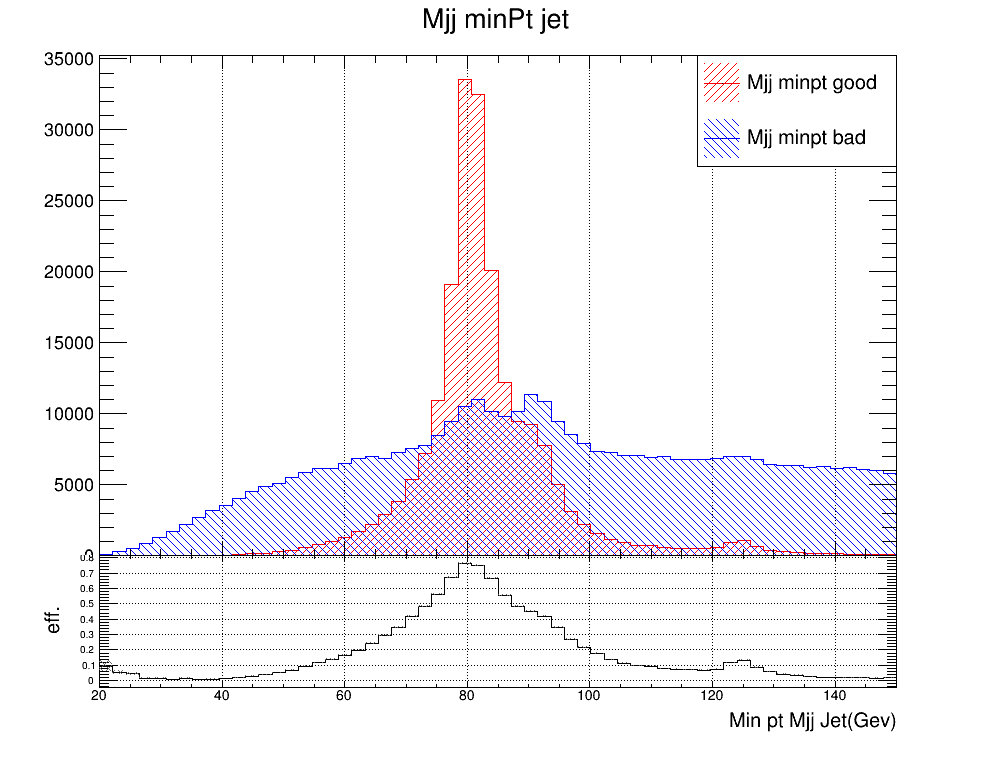

In [47]:
c1, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_pt.Draw("nostack hist")
legend = plotter.createLegend(h_pt, h_pt_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_pt, h_pt +h_pt_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Min pt Mjj Jet(Gev)")
hratio.GetXaxis().SetLabelSize(0.07)
c1.Draw()

In [48]:
print('efficiency')
print(h_pt.GetEntries()/(h_pt.GetEntries()+h_pt_bad.GetEntries()))

efficiency
0.15307268912457223


# Composing mineta e mw la vendetta

In [41]:
hs_pt = r.THStack("hs_pt","#Delta#eta distribution");
h_pt = r.TH1F("mjj_pt_good", "#Delta#eta good ", 60, -3, 3 )
h_pt.SetLineColor(r.kRed)
h_pt.SetFillColor(r.kRed)
h_pt.SetFillStyle(3004)
hs_pt.Add(h_pt)
h_pt_bad = r.TH1F("mjj_pt_bad ", "#Delta#eta bad ", 60, -3, 3 )
h_pt_bad.SetLineColor(r.kBlue)
h_pt_bad.SetFillColor(r.kBlue)
h_pt_bad.SetFillStyle(3005)
hs_pt.Add(h_pt_bad)

In [42]:
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #jsel selettore di getti il cui metodo viene applicato anche ai partoni per creare le coppie
    partons_pair = jsel.nearest_W_pair(evento.partons)
    jets_pair = jsel.deltaeta_mw2_pair(evento.jets)
    associazione = JetTagging.check_association(evento, partons_pair, [evento.jets[i] for i in jets_pair])
    if associazione:
        #se l'associazione va a buon fine restituisce TRUE e riempio l'histo con la massa dei due getti
            h_pt.Fill(evento.jets[jets_pair[0]].Eta()- evento.jets[jets_pair[1]].Eta())
    else :
        #se l'associazione non va a buon fine restituisce FALSE e inserisco nel secondo histo la massa dei due getti
            h_pt_bad.Fill(evento.jets[jets_pair[0]].Eta()- evento.jets[jets_pair[1]].Eta())

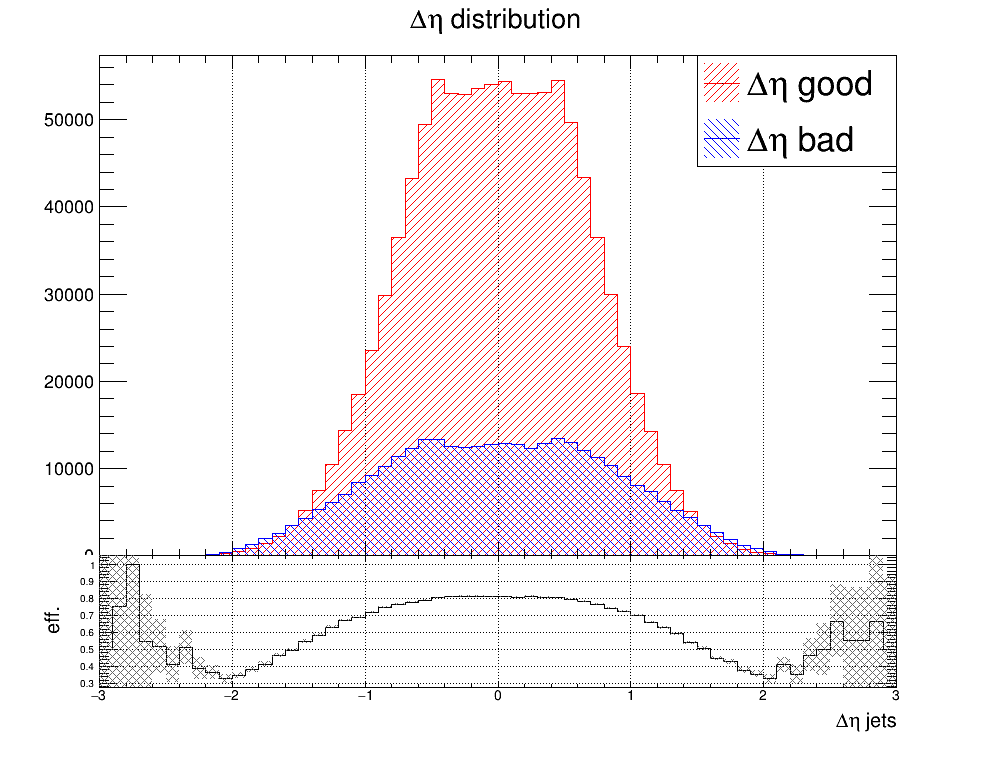

In [43]:
c1, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_pt.Draw("nostack hist")
legend = plotter.createLegend(h_pt, h_pt_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_pt, h_pt +h_pt_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "#Delta#eta jets")
hratio.GetXaxis().SetLabelSize(0.07)
c1.Draw()

In [44]:
print('efficiency')
print(h_pt.GetEntries()/(h_pt.GetEntries()+h_pt_bad.GetEntries()))

efficiency
0.7609179657838125


# Analisi per un codice migliore

In [24]:
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    print(evento.n_jets)
    l = []
    for i ,k  in combinations(range(len(evento.jets)),2):
        l.append(( [i,k], abs(evento.jets[i].Eta()- evento.jets[k].Eta()), abs(80-(evento.jets[i]+evento.jets[k]).M())))
    l = sorted(l, key=itemgetter(1))
    #l = sorted(l, key=itemgetter(1))
    l1 = []
    for i ,k  in combinations(range(len(evento.jets)),2):
        l1.append(([i,k], abs(80 - (evento.jets[i]+ evento.jets[k]).M() )))
    l1 = sorted(l1, key=itemgetter(1))
    print(l[0])
    print('-----')
    print(l[0][2]+l[0][1])
            

array('i', [4])
([2, 3], 0.1486464234887902, 3.5126376798563967)
-----
3.661284103345187
array('i', [4])
([0, 2], 0.4670720421892196, 0.885249429938284)
-----
1.3523214721275036
array('i', [4])
([1, 3], 0.6648533510564607, 8.764493398461738)
-----
9.4293467495182
array('i', [4])
([1, 3], 0.3484670233399523, 1.3010032667118168)
-----
1.649470290051769
array('i', [4])
([0, 2], 0.27353927191991456, 16.45113196426074)
-----
16.724671236180654
array('i', [4])
([1, 3], 0.6246559362343346, 1.8042255760191637)
-----
2.4288815122534984
array('i', [5])
([2, 3], 0.122733745716486, 0.36415095644748874)
-----
0.4868847021639747
array('i', [4])
([0, 2], 0.09150989449611946, 14.995516987053733)
-----
15.087026881549853
array('i', [5])
([0, 4], 0.1369770246931412, 2.7358857799211336)
-----
2.872862804614275
array('i', [4])
([2, 3], 1.0102556974270953, 1.9460594855919453)
-----
2.956315183019041
array('i', [6])
([0, 4], 0.004590657754039329, 51.75310966085624)
-----
51.757700318610276
array('i', [7])
(

In [ ]:
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    print('massa getti')
    print([j.M() for j in evento.jets])
    print('massa partoni')
    print([k.M() for k in evento.partons])
    #pairing = True quindi PairingTreeDriver
    #jsel selettore di getti il cui metodo viene applicato anche ai partoni per creare le coppie
    partons_pair = jsel.max_pt_pair(evento.partons)
    print('parton pair')
    print(partons_pair)
    jets_pair = jsel.max_pt_pair(evento.jets)
    print('jet pair')
    print(jets_pair)
    associazione = JetTagging.check_association(evento, partons_pair, [evento.jets[i] for i in jets_pair])
    if associazione:
            print('True')
            print('------')
        #se l'associazione va a buon fine restituisce TRUE e riempio l'histo con la massa dei due getti
            h_pt.Fill( (evento.jets[jets_pair[0]]+ evento.jets[jets_pair[1]]).Pt())
    else :
            print('False')
            print('prima coppia')
            print(evento.jets[jets_pair[0]].M())
            print(evento.partons[partons_pair[0]].M())
            print('seconda coppia')
            print(evento.jets[jets_pair[1]].M())
            print(evento.partons[partons_pair[1]].M())
            print('somma')
            print((evento.partons[0]+evento.partons[1]).M())
            print(evento.partons[1].M(),evento.partons[3].M())
            print((evento.partons[0]+evento.partons[3]).M())
            print('--------')
        #se l'associazione non va a buon fine restituisce FALSE e inserisco nel secondo histo la massa dei due getti
            h_pt_bad.Fill((evento.jets[jets_pair[0]]+ evento.jets[jets_pair[1]]).Pt())

In [4]:
#definisco uno stack per le associazioni getti partoni con strategia mjj maxpt (seleziono prima
#i due getti con massa invariante + grande e, dai rimanenti, seleziono quelli con massimo momento trasverso)
#stack per massima massa invariante
hs_mjj, h_mjj, h_mjj_bad = plotter.StackCreator2("Mjj jets", "Mjj good", "Mjj bad")

In [5]:
hs_mjj1, h_mjj1, h_mjj1_bad = plotter.StackCreator2("Se Mjj false, Mjj max deltaeta jets", "Mjj maxeta good", "Mjj maxeta bad")

In [6]:
hs_mjj2, h_mjj2, h_mjj2_bad = plotter.StackCreator3("Se Mjj, max deltaeta false, Mjj min pt jets", "Mjj minpt good", "Mjj minpt bad")

In [7]:
hjets = r.TH1F("hjets","number of jets in bad events",10,0,10)
hjets.SetLineColor(r.kBlack)
hjets.SetFillColor(r.kBlack)
hjets.SetFillStyle(3003)

In [8]:
hjets1 = r.TH1F("hjets","number of jets in good events",10,0,10)
hjets1.SetLineColor(r.kBlack)
hjets1.SetFillColor(r.kBlack)
hjets1.SetFillStyle(3003)

In [9]:
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #jsel selettore di getti il cui metodo viene applicato anche ai partoni per creare le coppie
    partons_pair = jsel.max_mjj_pair(evento.partons)
    jets_pair = jsel.max_mjj_pair(evento.jets)
    associazione = JetTagging.check_association(evento, partons_pair, [evento.jets[i] for i in jets_pair])
    if associazione:
        #se l'associazione va a buon fine restituisce TRUE e riempio l'histo con la massa dei due getti
            h_mjj.Fill( (evento.jets[jets_pair[0]]+ evento.jets[jets_pair[1]]).M())
            hjets1.Fill(evento.n_jets[0])
    else :
        #se l'associazione non va a buon fine restituisce FALSE e inserisco nel secondo histo la massa dei due getti
            h_mjj_bad.Fill((evento.jets[jets_pair[0]]+ evento.jets[jets_pair[1]]).M())
            hjets.Fill(evento.n_jets[0])
            partons_pair1 = jsel.max_deltaeta_pair(evento.partons)
            jets_pair1 = jsel.max_deltaeta_pair(evento.jets)
            associazione1 = JetTagging.check_association(evento, partons_pair1, [evento.jets[i] for i in jets_pair1])
            if associazione1:
                h_mjj1.Fill((evento.jets[jets_pair1[0]]+ evento.jets[jets_pair1[1]]).M())
            else:
                h_mjj1_bad.Fill((evento.jets[jets_pair1[0]]+ evento.jets[jets_pair1[1]]).M())
                partons_pair2 = jsel.min_pt_pair(evento.partons)
                jets_pair2 = jsel.min_pt_pair(evento.jets)
                associazione2 = JetTagging.check_association(evento, partons_pair2, [evento.jets[i] for i in jets_pair2])
                if associazione2:
                    h_mjj2.Fill((evento.jets[jets_pair2[0]]+ evento.jets[jets_pair2[1]]).M())
                else:
                    h_mjj2_bad.Fill((evento.jets[jets_pair2[0]]+ evento.jets[jets_pair2[1]]).M())

In [48]:
print('efficiency max mjj')
print(h_mjj.GetEntries()/(h_mjj.GetEntries()+h_mjj_bad.GetEntries()))

efficiency max mjj
0.8451225787616647


In [49]:
print('efficiency min pt')
print(h_mjj1.GetEntries()/(h_mjj1.GetEntries()+h_mjj1_bad.GetEntries()))

efficiency min pt
0.2664972082196867


In [50]:
print('efficiency max deltaeta')
print(h_mjj2.GetEntries()/(h_mjj2.GetEntries()+h_mjj2_bad.GetEntries()))

efficiency max deltaeta
0.2863103929394205


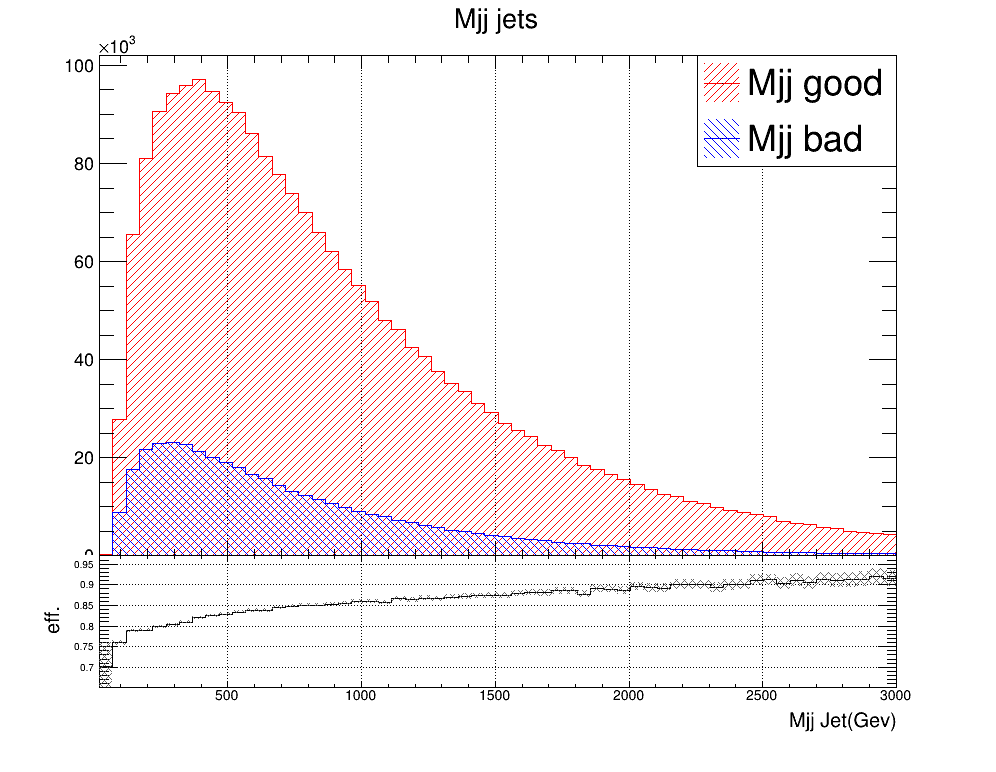

In [51]:
c1, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_mjj.Draw("nostack hist")
legend = plotter.createLegend(h_mjj, h_mjj_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_mjj, h_mjj +h_mjj_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Mjj Jet(Gev)")
#hratio.GetXaxis().SetLabelSize(0.07)
c1.Draw()

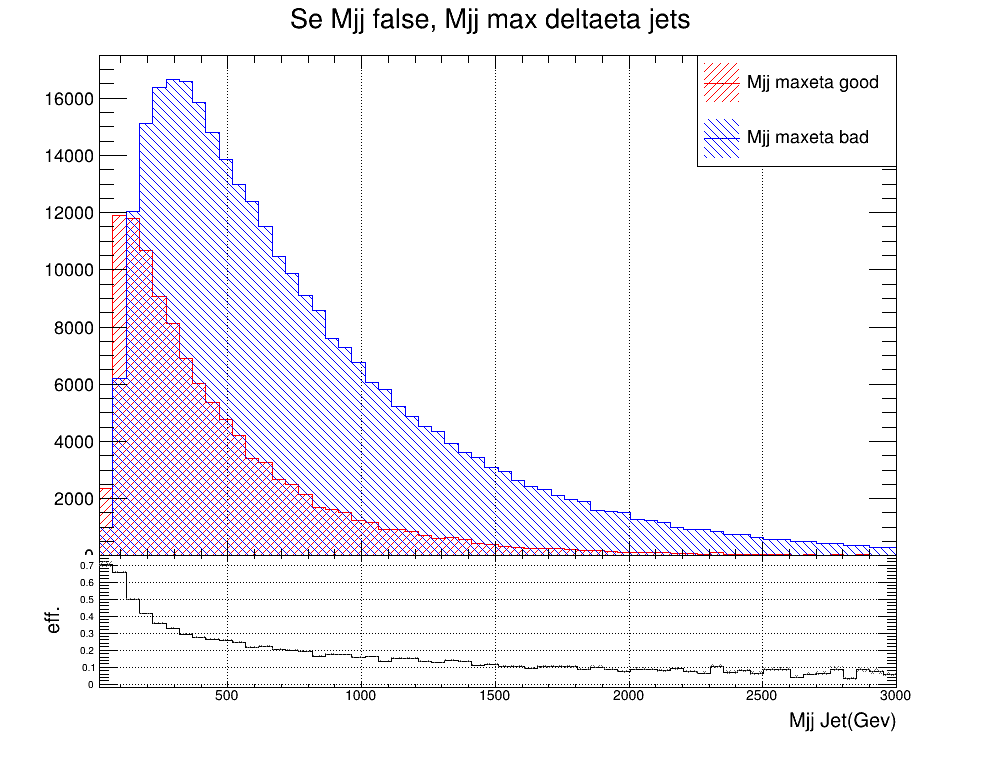

In [52]:
c2, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_mjj1.Draw("nostack hist")
legend = plotter.createLegend(h_mjj1, h_mjj1_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_mjj1, h_mjj1 +h_mjj1_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Mjj Jet(Gev)")
#hratio.GetXaxis().SetLabelSize(0.07)
c2.Draw()

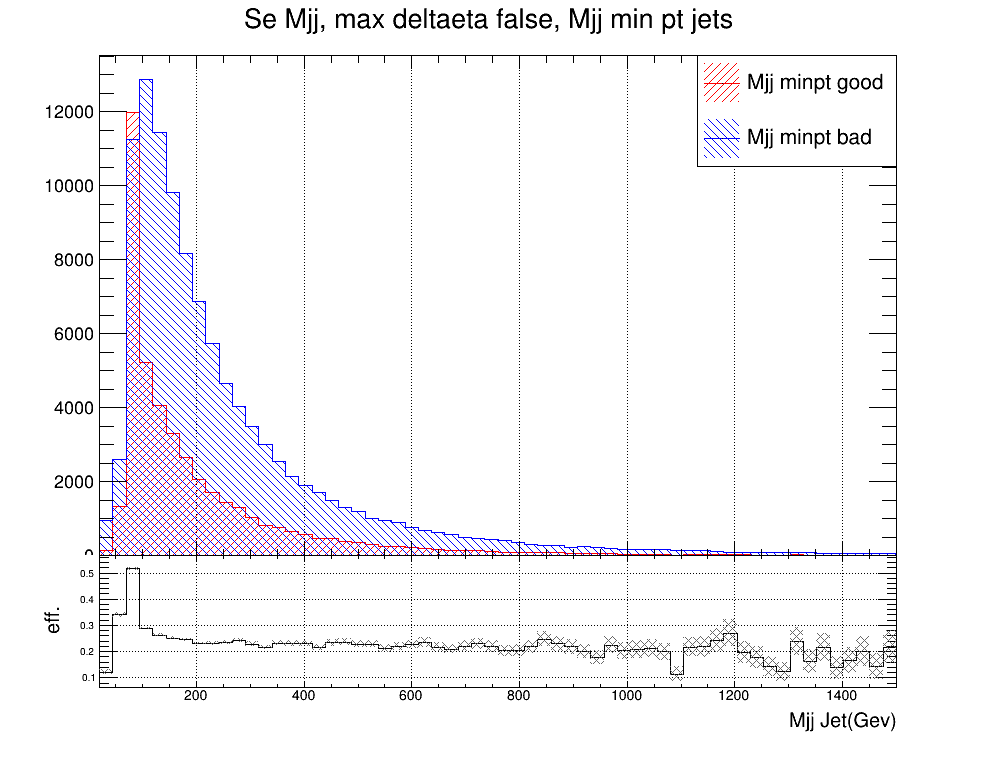

In [10]:
c3, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_mjj2.Draw("nostack hist")
legend = plotter.createLegend(h_mjj2, h_mjj2_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_mjj2, h_mjj2 +h_mjj2_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Mjj Jet(Gev)")
#hratio.GetXaxis().SetLabelSize(0.07)
c3.Draw()

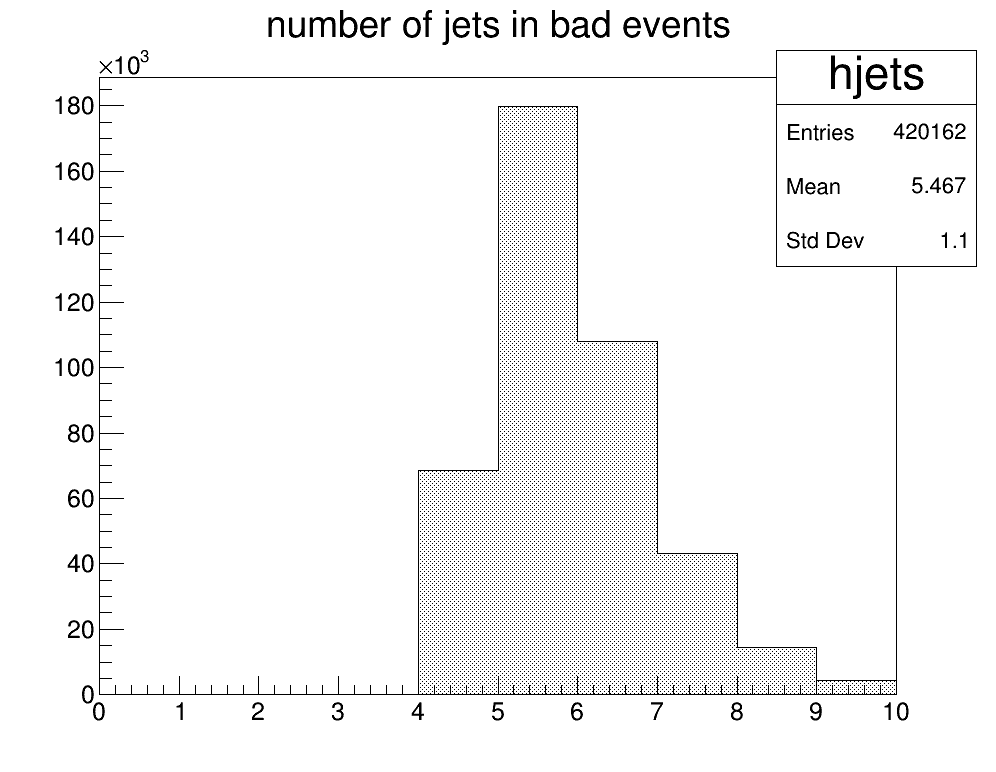

In [54]:
c4 = r.TCanvas("c4","canvas", 50, 50, 1000, 800)
hjets.Draw("hist")
c4.Draw()

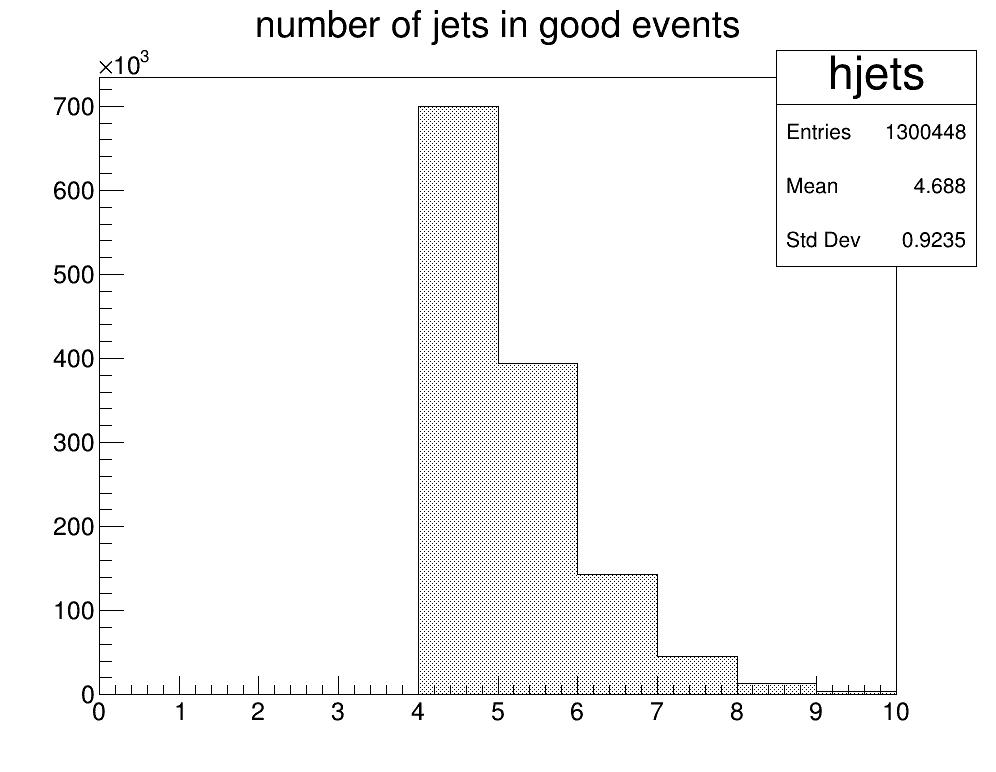

In [55]:
c5 = r.TCanvas("c4","canvas", 50, 50, 1000, 800)
hjets1.Draw("hist")
c5.Draw()

# Trying combining everything

In [57]:
hs_pt = r.THStack("hs_pt","prova distribution");
h_pt = r.TH1F("mjj_pt_good", "prova good ", 60, 20, 150 )
h_pt.SetLineColor(r.kRed)
h_pt.SetFillColor(r.kRed)
h_pt.SetFillStyle(3004)
hs_pt.Add(h_pt)
h_pt_bad = r.TH1F("mjj_pt_bad ", "prova bad ", 60, 20, 150 )
h_pt_bad.SetLineColor(r.kBlue)
h_pt_bad.SetFillColor(r.kBlue)
h_pt_bad.SetFillStyle(3005)
hs_pt.Add(h_pt_bad)

In [58]:
hs_pt1 = r.THStack("hs_pt","prova distribution");
h_pt1 = r.TH1F("mjj_pt_good", "prova good ", 10, 0, 8 )
h_pt1.SetLineColor(r.kRed)
h_pt1.SetFillColor(r.kRed)
h_pt1.SetFillStyle(3004)
hs_pt1.Add(h_pt1)
h_pt1_bad = r.TH1F("mjj_pt_bad ", "prova bad ", 10, 0, 8 )
h_pt1_bad.SetLineColor(r.kBlue)
h_pt1_bad.SetFillColor(r.kBlue)
h_pt1_bad.SetFillStyle(3005)
hs_pt1.Add(h_pt1_bad)

In [59]:
hs_pt2 = r.THStack("hs_pt","prova distribution");
h_pt2 = r.TH1F("mjj_pt_good", "prova good ", 60, 20, 800 )
h_pt2.SetLineColor(r.kRed)
h_pt2.SetFillColor(r.kRed)
h_pt2.SetFillStyle(3004)
hs_pt2.Add(h_pt2)
h_pt2_bad = r.TH1F("mjj_pt_bad ", "prova bad ", 60, 20, 800 )
h_pt2_bad.SetLineColor(r.kBlue)
h_pt2_bad.SetFillColor(r.kBlue)
h_pt2_bad.SetFillStyle(3005)
hs_pt2.Add(h_pt2_bad)

In [60]:
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #jsel selettore di getti il cui metodo viene applicato anche ai partoni per creare le coppie
    partons_pair = jsel.nearest_W_pair(evento.partons)
    jets_pair = jsel.combined_pair(evento.jets)
    associazione = JetTagging.check_association(evento, partons_pair, [evento.jets[i] for i in jets_pair])
    if associazione:
        #se l'associazione va a buon fine restituisce TRUE e riempio l'histo con la massa dei due getti
            h_pt.Fill((evento.jets[jets_pair[0]]+evento.jets[jets_pair[1]]).M())
            h_pt1.Fill(evento.n_jets[0])
            h_pt2.Fill((evento.jets[jets_pair[0]]+evento.jets[jets_pair[1]]).Pt())
    else :
        #se l'associazione non va a buon fine restituisce FALSE e inserisco nel secondo histo la massa dei due getti
            h_pt_bad.Fill((evento.jets[jets_pair[0]]+evento.jets[jets_pair[1]]).M())
            h_pt1_bad.Fill(evento.n_jets[0])
            h_pt2_bad.Fill((evento.jets[jets_pair[0]]+evento.jets[jets_pair[1]]).Pt())

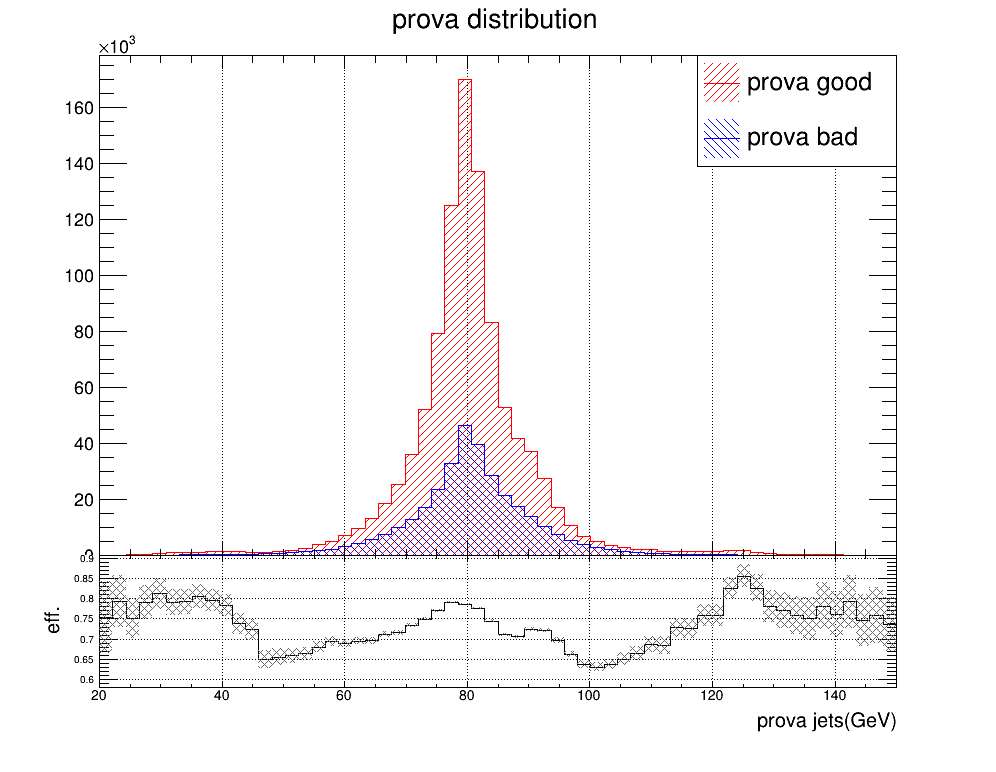

In [61]:
c1, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_pt.Draw("nostack hist")
legend = plotter.createLegend(h_pt, h_pt_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_pt, h_pt +h_pt_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "prova jets(GeV)")
hratio.GetXaxis().SetLabelSize(0.07)
c1.Draw()

In [62]:
print('efficiency')
print(h_pt.GetEntries()/(h_pt.GetEntries()+h_pt_bad.GetEntries()))

efficiency
0.7493884700619419


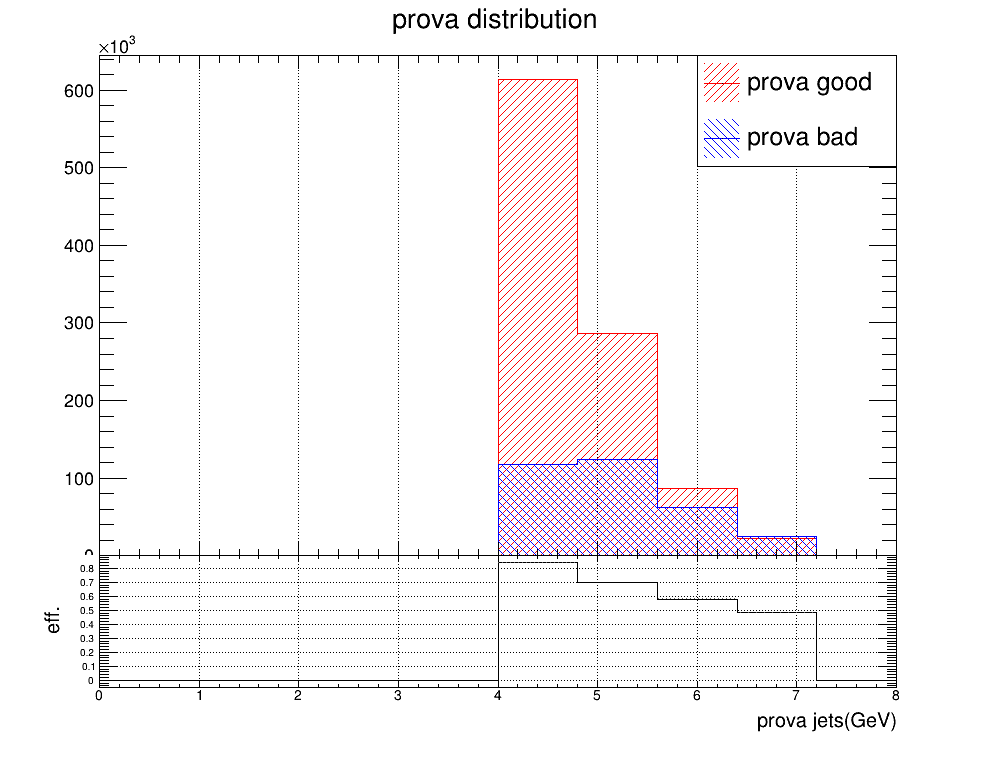

In [63]:
c2, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_pt1.Draw("nostack hist")
legend = plotter.createLegend(h_pt1, h_pt1_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_pt1, h_pt1 +h_pt1_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "prova jets(GeV)")
hratio.GetXaxis().SetLabelSize(0.07)
c2.Draw()

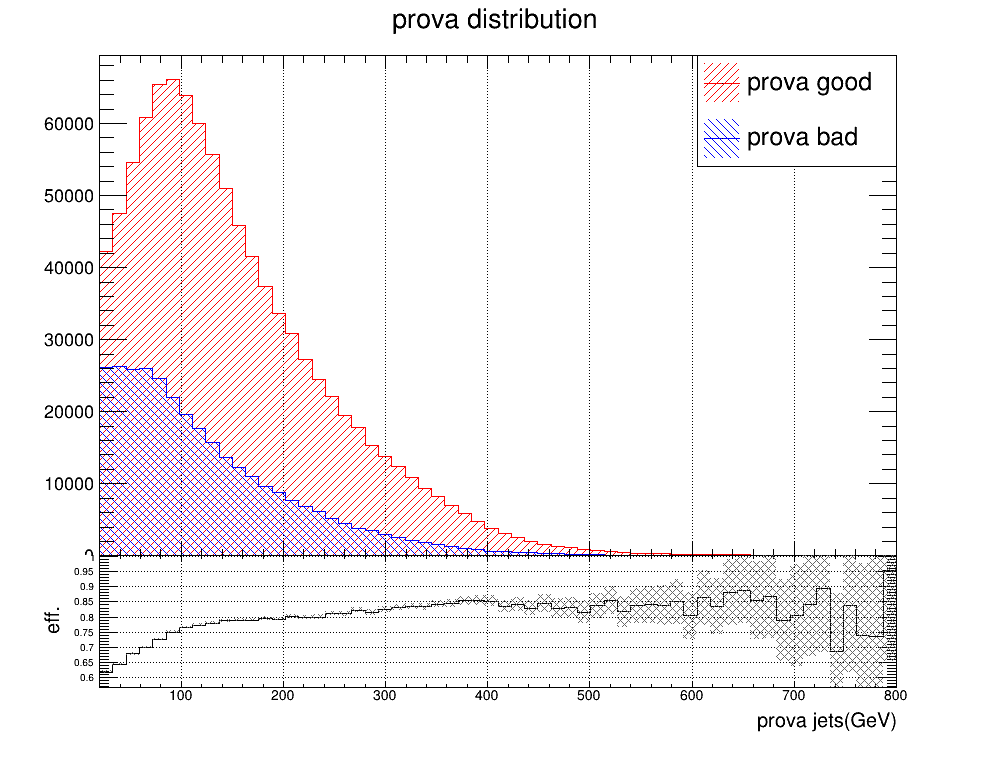

In [64]:
c3, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_pt2.Draw("nostack hist")
legend = plotter.createLegend(h_pt2, h_pt2_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_pt2, h_pt2 +h_pt2_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "prova jets(GeV)")
hratio.GetXaxis().SetLabelSize(0.07)
c3.Draw()


# 